In [1]:
import pandas as pd

In [2]:
import urllib.request

url = "https://www.cryptodatadownload.com/cdd/Bitstamp_BTCUSD_1h.csv"
file_name = "file.csv"

urllib.request.urlretrieve(url, file_name)

('file.csv', <http.client.HTTPMessage at 0x7a6596913b80>)

In [3]:
import csv

new_file_name = "new_file.csv"

with open(file_name, "r") as f:
    file_reader = csv.reader(f)
    datas = list(file_reader)[1:]  # İlk satırı atla

with open(new_file_name, "w", newline="") as nf:
    yazici = csv.writer(nf)
    yazici.writerows(datas)

print("İlk satır silindi ve yeni dosya oluşturuldu.")

İlk satır silindi ve yeni dosya oluşturuldu.


In [4]:
!pip install -q kaggle

In [5]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"plexible","key":"70102ac78fd9321007b9550276ae20ee"}'}

In [6]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [7]:
!kaggle datasets download -d kaushiksuresh147/bitcoin-tweets

 99% 689M/695M [00:13<00:00, 57.0MB/s]
100% 695M/695M [00:13<00:00, 55.5MB/s]


In [8]:
!unzip "/content/bitcoin-tweets.zip" -d "/content/"

Archive:  /content/bitcoin-tweets.zip
  inflating: /content/Bitcoin_tweets.csv  
  inflating: /content/Bitcoin_tweets_dataset_2.csv  


In [9]:
import pandas as pd

In [10]:
df1 = pd.read_csv('Bitcoin_tweets.csv',lineterminator='\n',low_memory=False)

In [11]:
df = df1.copy()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4689354 entries, 0 to 4689353
Data columns (total 13 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_name         object
 1   user_location     object
 2   user_description  object
 3   user_created      object
 4   user_followers    object
 5   user_friends      object
 6   user_favourites   object
 7   user_verified     object
 8   date              object
 9   text              object
 10  hashtags          object
 11  source            object
 12  is_retweet        object
dtypes: object(13)
memory usage: 465.1+ MB


In [13]:
df['date_time'] = pd.to_datetime(df['date'], errors='coerce')
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [14]:
df['user_followers'] = pd.to_numeric(df['user_followers'],errors='coerce')
df['user_friends'] = pd.to_numeric(df['user_friends'],errors='coerce')
df['user_favourites'] = pd.to_numeric(df['user_favourites'],errors='coerce')
df['user_verified'] = df['user_verified'].astype(bool)
df['is_retweet'] = df['is_retweet'].astype(bool)

In [15]:
df.tail()

user_name            user_location  \
4689349             TAnotepad     Not financial advice   
4689350              Boba-Feh  South of the North Pole   
4689351         Ethereum Yoda                      NaN   
4689352  Bitcoin Price Ticker                      NaN   
4689353          faucetojisan                      NaN   

                                          user_description  \
4689349  #Bitcoin | Forever Alone Crypto Trader 😭 | Ana...   
4689350         My backpack has jets. Reformed Necromonger   
4689351      UP or DOWN...\n.\n.\n.\n.\nPrice matters NOT.   
4689352  Tweets the current price of #bitcoin every 5 m...   
4689353  💰faucetpay 👉\nhttps://t.co/eHqMw9QdFx\n\n💰betf...   

                user_created  user_followers  user_friends  user_favourites  \
4689349  2022-11-04 10:18:11           674.0        1789.0          27466.0   
4689350  2008-04-02 21:48:47            79.0         454.0            125.0   
4689351  2022-07-24 04:50:18           532.0           1.0              0.0   
4689352  2022-10-20 07:10:38            83.0           7.0              9.0   
4689353  2022-10-13 05:41:53            14.0          10.0              0.0   

         user_verified                date  \
4689349           True 2023-01-06 17:46:35   
4689350           True 2023-01-06 17:46:29   
4689351           True 2023-01-06 17:46:22   
4689352           True 2023-01-06 17:46:20   
4689353           True 2023-01-06 17:46:17   

                                                      text  \
4689349  Bitcoin squeeze is SUPER TIGHT, which way will...   
4689350  Closed #BTC short at 16725. Missed my long pla...   
4689351  #Ethereum price update: \n\n#ETH $1263.59 USD\...   
4689352  1₿ = $16814.7 -0.07%🔻\n\nDetails:\nChange: 🔻-1...   
4689353  Earn crypto by playing fun games online.\nGet ...   

                                                  hashtags  \
4689349  ['BTC', 'bitcoin', 'Crypto', 'cryptocurrency',...   
4689350                                            ['BTC']   
4689351  ['Ethereum', 'ETH', 'Bitcoin', 'BTC', 'altcoin...   
4689352                                 ['bitcoin', 'btc']   
4689353                     ['faucet', 'cointiply', 'BTC']   

                         source  is_retweet           date_time  
4689349     Twitter for Android       False 2023-01-06 17:46:35  
4689350     Twitter for Android       False 2023-01-06 17:46:29  
4689351         Twitter Web App       False 2023-01-06 17:46:22  
4689352  BitcoinLivePriceTicker       False 2023-01-06 17:46:20  
4689353     Twitter for Android       False 2023-01-06 17:46:17

In [16]:
df = df[(df['date'] > '2022-03-02 00:00:00') & (df['date'] < '2022-03-25 23:59:59')]
df.head()

user_name    user_location  \
2339096                                           Hem              NaN   
2339097                                kei arisa mugo              NaN   
2339098                                 Ryan de Mateo              NaN   
2339099                                Gery Rodriguez     Across Space   
2339100  Blessed Mom of 3 kiddos~I 💗 them so much~🕊️🥀  Albuquerque, NM   

                                          user_description  \
2339096                                                NaN   
2339097                                                NaN   
2339098                                                NaN   
2339099                                           #Bitcoin   
2339100  💜Mom of Doom, G-Ray & CeeJ💜#TheBeKindImpact 💝 ...   

                user_created  user_followers  user_friends  user_favourites  \
2339096  2020-02-13 08:56:22            19.0          79.0            196.0   
2339097  2021-08-27 20:30:14            15.0          52.0             34.0   
2339098  2019-03-06 11:27:39             3.0         155.0             27.0   
2339099  2011-12-23 18:49:39           214.0         234.0           4698.0   
2339100  2011-06-07 14:40:15           336.0         878.0          11043.0   

         user_verified                date  \
2339096           True 2022-03-02 23:59:59   
2339097           True 2022-03-02 23:59:56   
2339098           True 2022-03-02 23:59:55   
2339099           True 2022-03-02 23:59:53   
2339100           True 2022-03-02 23:59:52   

                                                      text  \
2339096  If anything, WOLVERINU is going to moon with t...   
2339097  If anything, WOLVERINU is going to moon with t...   
2339098  create twitter tasks and pay with #bitcoin #et...   
2339099  Whatever the mainstream media is narrating and...   
2339100  @TheMoonCarl #Solana #MATIC maybe #Ada but if ...   

                                                  hashtags  \
2339096  ['crypto', 'bitcoin', 'cryptocurrency', 'btc',...   
2339097  ['crypto', 'bitcoin', 'cryptocurrency', 'btc',...   
2339098                ['bitcoin', 'ethereum', 'litecoin']   
2339099                                        ['Bitcoin']   
2339100              ['Solana', 'MATIC', 'Ada', 'Bitcoin']   

                      source  is_retweet           date_time  
2339096      Twitter Web App       False 2022-03-02 23:59:59  
2339097      Twitter Web App       False 2022-03-02 23:59:56  
2339098  Twitter for Android       False 2022-03-02 23:59:55  
2339099      Twitter Web App       False 2022-03-02 23:59:53  
2339100  Twitter for Android       False 2022-03-02 23:59:52

In [17]:
df.tail()

user_name                user_location  \
2699153           mahir_9       Jawa Tengah, Indonesia   
2699154      reepamungkas  Denpasar Selatan, Indonesia   
2699155     Crypto Volume                          NaN   
2699156          Manish S            Chandigarh, India   
2699157  Stephen L Dalton  Pasig City, The Philippines   

                                          user_description  \
2699153                                      tukang ledeng   
2699154                                         art is fun   
2699155  Get alerted on abnormal volume moves in the cr...   
2699156  Physical Therapist(Freelancer), Homecare Servi...   
2699157  Freelance Writer, Sports Enthusiast, and all-a...   

                user_created  user_followers  user_friends  user_favourites  \
2699153  2009-11-19 13:19:44          1311.0        4846.0          12548.0   
2699154  2013-06-05 19:34:40            31.0         382.0           1199.0   
2699155  2022-02-19 12:41:04          5130.0           0.0              0.0   
2699156  2022-01-19 09:43:55           179.0        1416.0           6793.0   
2699157  2014-03-14 06:42:35          1342.0        1519.0           2173.0   

         user_verified                date  \
2699153           True 2022-03-20 02:19:38   
2699154           True 2022-03-20 02:19:37   
2699155           True 2022-03-20 02:19:32   
2699156           True 2022-03-20 02:19:27   
2699157           True 2022-03-20 02:18:50   

                                                      text  \
2699153  @OfficialTravlad I have done the task, it's ti...   
2699154  @binance Laszlo Hanyacz was the first person t...   
2699155  #MKRUSDT Bull Alert!\n\n60X Volume\nPrice:    ...   
2699156  @RJWGMI We don't buy #bitcoin\ngenuine Idea to...   
2699157  What Is Uniswap &amp; How to Earn Interest Inc...   

                                                  hashtags  \
2699153  ['BSC', 'BNB', 'BTC', 'ETH', 'Airdrop', 'NFT',...   
2699154                ['btc', 'BitcoinButton', 'binance']   
2699155  ['MKRUSDT', 'crypto', 'whale', 'btc', 'eth', '...   
2699156  ['bitcoin', 'crypto', 'stock', 'Safemoon', 'BT...   
2699157  ['Crypto', 'cryptocurrency', 'cryptoinvesting'...   

                      source  is_retweet           date_time  
2699153  Twitter for Android       False 2022-03-20 02:19:38  
2699154  Twitter for Android       False 2022-03-20 02:19:37  
2699155  abnormal_crypto_app       False 2022-03-20 02:19:32  
2699156  Twitter for Android       False 2022-03-20 02:19:27  
2699157              Penname       False 2022-03-20 02:18:50

In [18]:
df_clean=df.copy()

In [19]:
df = df.dropna(subset=['user_name'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360058 entries, 2339096 to 2699157
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_name         360058 non-null  object        
 1   user_location     162034 non-null  object        
 2   user_description  306162 non-null  object        
 3   user_created      360058 non-null  object        
 4   user_followers    360058 non-null  float64       
 5   user_friends      360058 non-null  float64       
 6   user_favourites   360058 non-null  float64       
 7   user_verified     360058 non-null  bool          
 8   date              360058 non-null  datetime64[ns]
 9   text              360058 non-null  object        
 10  hashtags          360049 non-null  object        
 11  source            360049 non-null  object        
 12  is_retweet        360058 non-null  bool          
 13  date_time         360058 non-null  datetime64[ns]
dt

In [21]:
df = df.drop(['user_location', 'user_description','user_created','source'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360058 entries, 2339096 to 2699157
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   user_name        360058 non-null  object        
 1   user_followers   360058 non-null  float64       
 2   user_friends     360058 non-null  float64       
 3   user_favourites  360058 non-null  float64       
 4   user_verified    360058 non-null  bool          
 5   date             360058 non-null  datetime64[ns]
 6   text             360058 non-null  object        
 7   hashtags         360049 non-null  object        
 8   is_retweet       360058 non-null  bool          
 9   date_time        360058 non-null  datetime64[ns]
dtypes: bool(2), datetime64[ns](2), float64(3), object(3)
memory usage: 25.4+ MB


In [22]:
# clean df
from time import sleep
import pandas as pd
import re
import numpy as np
import pandas as pd
#clean the tweets with a function
def cleanTweets(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text) #removes @mentions
    text = re.sub(r'#','',text) #removes hastag '#' symbol
    text = re.sub(r'RT[\s]+','',text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'[^\w\s,]', '',text)
    text = re.sub(r'\n','',text)
    return text
df['text'] = df['text'].apply(cleanTweets)
df_clean['text'] = df['text'].str.lower()
df_clean.head()

user_name    user_location  \
2339096                                           Hem              NaN   
2339097                                kei arisa mugo              NaN   
2339098                                 Ryan de Mateo              NaN   
2339099                                Gery Rodriguez     Across Space   
2339100  Blessed Mom of 3 kiddos~I 💗 them so much~🕊️🥀  Albuquerque, NM   

                                          user_description  \
2339096                                                NaN   
2339097                                                NaN   
2339098                                                NaN   
2339099                                           #Bitcoin   
2339100  💜Mom of Doom, G-Ray & CeeJ💜#TheBeKindImpact 💝 ...   

                user_created  user_followers  user_friends  user_favourites  \
2339096  2020-02-13 08:56:22            19.0          79.0            196.0   
2339097  2021-08-27 20:30:14            15.0          52.0             34.0   
2339098  2019-03-06 11:27:39             3.0         155.0             27.0   
2339099  2011-12-23 18:49:39           214.0         234.0           4698.0   
2339100  2011-06-07 14:40:15           336.0         878.0          11043.0   

         user_verified                date  \
2339096           True 2022-03-02 23:59:59   
2339097           True 2022-03-02 23:59:56   
2339098           True 2022-03-02 23:59:55   
2339099           True 2022-03-02 23:59:53   
2339100           True 2022-03-02 23:59:52   

                                                      text  \
2339096  if anything, wolverinu is going to moon with t...   
2339097  if anything, wolverinu is going to moon with t...   
2339098  create twitter tasks and pay with bitcoin ethe...   
2339099  whatever the mainstream media is narrating and...   
2339100   solana matic maybe ada but if probably put it...   

                                                  hashtags  \
2339096  ['crypto', 'bitcoin', 'cryptocurrency', 'btc',...   
2339097  ['crypto', 'bitcoin', 'cryptocurrency', 'btc',...   
2339098                ['bitcoin', 'ethereum', 'litecoin']   
2339099                                        ['Bitcoin']   
2339100              ['Solana', 'MATIC', 'Ada', 'Bitcoin']   

                      source  is_retweet           date_time  
2339096      Twitter Web App       False 2022-03-02 23:59:59  
2339097      Twitter Web App       False 2022-03-02 23:59:56  
2339098  Twitter for Android       False 2022-03-02 23:59:55  
2339099      Twitter Web App       False 2022-03-02 23:59:53  
2339100  Twitter for Android       False 2022-03-02 23:59:52

In [23]:
df_unique = df_clean.drop_duplicates(subset='text')
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278159 entries, 2339096 to 2699155
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_name         278159 non-null  object        
 1   user_location     133861 non-null  object        
 2   user_description  248850 non-null  object        
 3   user_created      278159 non-null  object        
 4   user_followers    278159 non-null  float64       
 5   user_friends      278159 non-null  float64       
 6   user_favourites   278159 non-null  float64       
 7   user_verified     278159 non-null  bool          
 8   date              278159 non-null  datetime64[ns]
 9   text              278159 non-null  object        
 10  hashtags          278150 non-null  object        
 11  source            278150 non-null  object        
 12  is_retweet        278159 non-null  bool          
 13  date_time         278159 non-null  datetime64[ns]
dt

In [24]:
df_clean = df_unique.copy()
irrelevant_hashtags = ['nft','giveaway','cashback','airdrop','gift']
df_clean['hashtags'] = df_clean['hashtags'].str.lower()
df_clean = df_clean[df_clean['hashtags'].str.contains('|'.join(irrelevant_hashtags)) == False].reset_index(drop = True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224733 entries, 0 to 224732
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_name         224733 non-null  object        
 1   user_location     110156 non-null  object        
 2   user_description  202241 non-null  object        
 3   user_created      224733 non-null  object        
 4   user_followers    224733 non-null  float64       
 5   user_friends      224733 non-null  float64       
 6   user_favourites   224733 non-null  float64       
 7   user_verified     224733 non-null  bool          
 8   date              224733 non-null  datetime64[ns]
 9   text              224733 non-null  object        
 10  hashtags          224733 non-null  object        
 11  source            224733 non-null  object        
 12  is_retweet        224733 non-null  bool          
 13  date_time         224733 non-null  datetime64[ns]
dtypes: b

In [25]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [26]:
analyzer = SentimentIntensityAnalyzer()
compound = []

for s in enumerate(df_clean['text']):
    vs = analyzer.polarity_scores(str(s))
    compound.append(vs["compound"])
df_clean["compound"] = compound
df_clean.head(10)

user_name              user_location  \
0                                 Ryan de Mateo                        NaN   
1                                Gery Rodriguez               Across Space   
2  Blessed Mom of 3 kiddos~I 💗 them so much~🕊️🥀            Albuquerque, NM   
3        The Crypto Curator #BTC100K 🔥 🚀 🏳️‍🌈 🟩             Everywhere ;)    
4                          Hodlers Journey 🍁 ⚡️                        NaN   
5                                        D WOLF  Adelaide, South Australia   
6                                       Cgerdes                        NaN   
7                                   Crypto Geek                        NaN   
8                              David Gokhshtein               New York, NY   
9                                 Nosleeptrader                 California   

                                    user_description         user_created  \
0                                                NaN  2019-03-06 11:27:39   
1                                           #Bitcoin  2011-12-23 18:49:39   
2  💜Mom of Doom, G-Ray & CeeJ💜#TheBeKindImpact 💝 ...  2011-06-07 14:40:15   
3  #Bitcoin Evangelist and Aficionado. Military #...  2009-01-17 13:25:27   
4                                           #bitcoin  2021-04-08 18:39:21   
5  FOUNDER: CRYPTO WOLF TRADING #BITCOIN FOR WORL...  2017-09-10 17:06:46   
6  Middle school science teacher. Love my kids an...  2019-12-07 14:41:43   
7  I write about crypto, NFTs and other blockchai...  2022-02-28 23:34:18   
8  Founder @GokhshteinMedia | Creator of @circleo...  2010-07-23 20:33:57   
9                                 Ask more questions  2015-09-06 08:56:38   

   user_followers  user_friends  user_favourites  user_verified  \
0             3.0         155.0             27.0           True   
1           214.0         234.0           4698.0           True   
2           336.0         878.0          11043.0           True   
3         27860.0       10162.0         139886.0           True   
4           236.0        1126.0            715.0           True   
5           363.0         238.0          39069.0           True   
6            74.0          65.0           1706.0           True   
7             4.0          23.0              5.0           True   
8        611215.0         725.0          75621.0           True   
9            89.0         158.0           1269.0           True   

                 date                                               text  \
0 2022-03-02 23:59:55  create twitter tasks and pay with bitcoin ethe...   
1 2022-03-02 23:59:53  whatever the mainstream media is narrating and...   
2 2022-03-02 23:59:52   solana matic maybe ada but if probably put it...   
3 2022-03-02 23:59:51   congrats have you heard about btc do you have...   
4 2022-03-02 23:59:49   now eliminate the debt and add bitcoin to the...   
5 2022-03-02 23:59:44                               citizens buy bitcoin   
6 2022-03-02 23:59:33  carebear2614 found bitcoin in a user vault at ...   
7 2022-03-02 23:59:31    1 how can bitcoin become a global currency f...   
8 2022-03-02 23:59:29    yes, we know bitcoin supply is low on exchanges   
9 2022-03-02 23:59:28      apparently over 2000 russian oligarchs dis...   

                                         hashtags               source  \
0             ['bitcoin', 'ethereum', 'litecoin']  Twitter for Android   
1                                     ['bitcoin']      Twitter Web App   
2           ['solana', 'matic', 'ada', 'bitcoin']  Twitter for Android   
3                                     ['bitcoin']      Twitter Web App   
4                                     ['bitcoin']   Twitter for iPhone   
5                                     ['bitcoin']   Twitter for iPhone   
6  ['bitcoin', 'coinhuntworld', 'cryptocurrency']  Twitter for Android   
7                           ['bitcoin', 'crypto']  Twitter for Android   
8                                     ['bitcoin']   Twitter for iPhone   
9               

In [27]:
sentiment = []
for i in df_clean["compound"]:
  if i >= 0.05:
    sentiment.append("Positive")
  elif i <= -0.05:
    sentiment.append("Negative")
  else:
    sentiment.append("Neutral")
df_clean["sentiment"] = sentiment
df_clean.head(10)

user_name              user_location  \
0                                 Ryan de Mateo                        NaN   
1                                Gery Rodriguez               Across Space   
2  Blessed Mom of 3 kiddos~I 💗 them so much~🕊️🥀            Albuquerque, NM   
3        The Crypto Curator #BTC100K 🔥 🚀 🏳️‍🌈 🟩             Everywhere ;)    
4                          Hodlers Journey 🍁 ⚡️                        NaN   
5                                        D WOLF  Adelaide, South Australia   
6                                       Cgerdes                        NaN   
7                                   Crypto Geek                        NaN   
8                              David Gokhshtein               New York, NY   
9                                 Nosleeptrader                 California   

                                    user_description         user_created  \
0                                                NaN  2019-03-06 11:27:39   
1                                           #Bitcoin  2011-12-23 18:49:39   
2  💜Mom of Doom, G-Ray & CeeJ💜#TheBeKindImpact 💝 ...  2011-06-07 14:40:15   
3  #Bitcoin Evangelist and Aficionado. Military #...  2009-01-17 13:25:27   
4                                           #bitcoin  2021-04-08 18:39:21   
5  FOUNDER: CRYPTO WOLF TRADING #BITCOIN FOR WORL...  2017-09-10 17:06:46   
6  Middle school science teacher. Love my kids an...  2019-12-07 14:41:43   
7  I write about crypto, NFTs and other blockchai...  2022-02-28 23:34:18   
8  Founder @GokhshteinMedia | Creator of @circleo...  2010-07-23 20:33:57   
9                                 Ask more questions  2015-09-06 08:56:38   

   user_followers  user_friends  user_favourites  user_verified  \
0             3.0         155.0             27.0           True   
1           214.0         234.0           4698.0           True   
2           336.0         878.0          11043.0           True   
3         27860.0       10162.0         139886.0           True   
4           236.0        1126.0            715.0           True   
5           363.0         238.0          39069.0           True   
6            74.0          65.0           1706.0           True   
7             4.0          23.0              5.0           True   
8        611215.0         725.0          75621.0           True   
9            89.0         158.0           1269.0           True   

                 date                                               text  \
0 2022-03-02 23:59:55  create twitter tasks and pay with bitcoin ethe...   
1 2022-03-02 23:59:53  whatever the mainstream media is narrating and...   
2 2022-03-02 23:59:52   solana matic maybe ada but if probably put it...   
3 2022-03-02 23:59:51   congrats have you heard about btc do you have...   
4 2022-03-02 23:59:49   now eliminate the debt and add bitcoin to the...   
5 2022-03-02 23:59:44                               citizens buy bitcoin   
6 2022-03-02 23:59:33  carebear2614 found bitcoin in a user vault at ...   
7 2022-03-02 23:59:31    1 how can bitcoin become a global currency f...   
8 2022-03-02 23:59:29    yes, we know bitcoin supply is low on exchanges   
9 2022-03-02 23:59:28      apparently over 2000 russian oligarchs dis...   

                                         hashtags               source  \
0             ['bitcoin', 'ethereum', 'litecoin']  Twitter for Android   
1                                     ['bitcoin']      Twitter Web App   
2           ['solana', 'matic', 'ada', 'bitcoin']  Twitter for Android   
3                                     ['bitcoin']      Twitter Web App   
4                                     ['bitcoin']   Twitter for iPhone   
5                                     ['bitcoin']   Twitter for iPhone   
6  ['bitcoin', 'coinhuntworld', 'cryptocurrency']  Twitter for Android   
7                           ['bitcoin', 'crypto']  Twitter for Android   
8                                     ['bitcoin']   Twitter for iPhone   
9               

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='sentiment'>

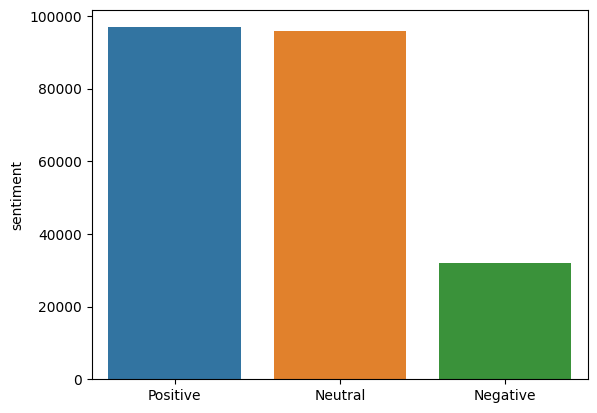

In [29]:
feq = df_clean['sentiment'].value_counts()
sns.barplot(x=feq.index,y = feq)

In [30]:
df_clean['hashtags'] = df_clean['hashtags'].apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))

<Axes: ylabel='hashtags'>

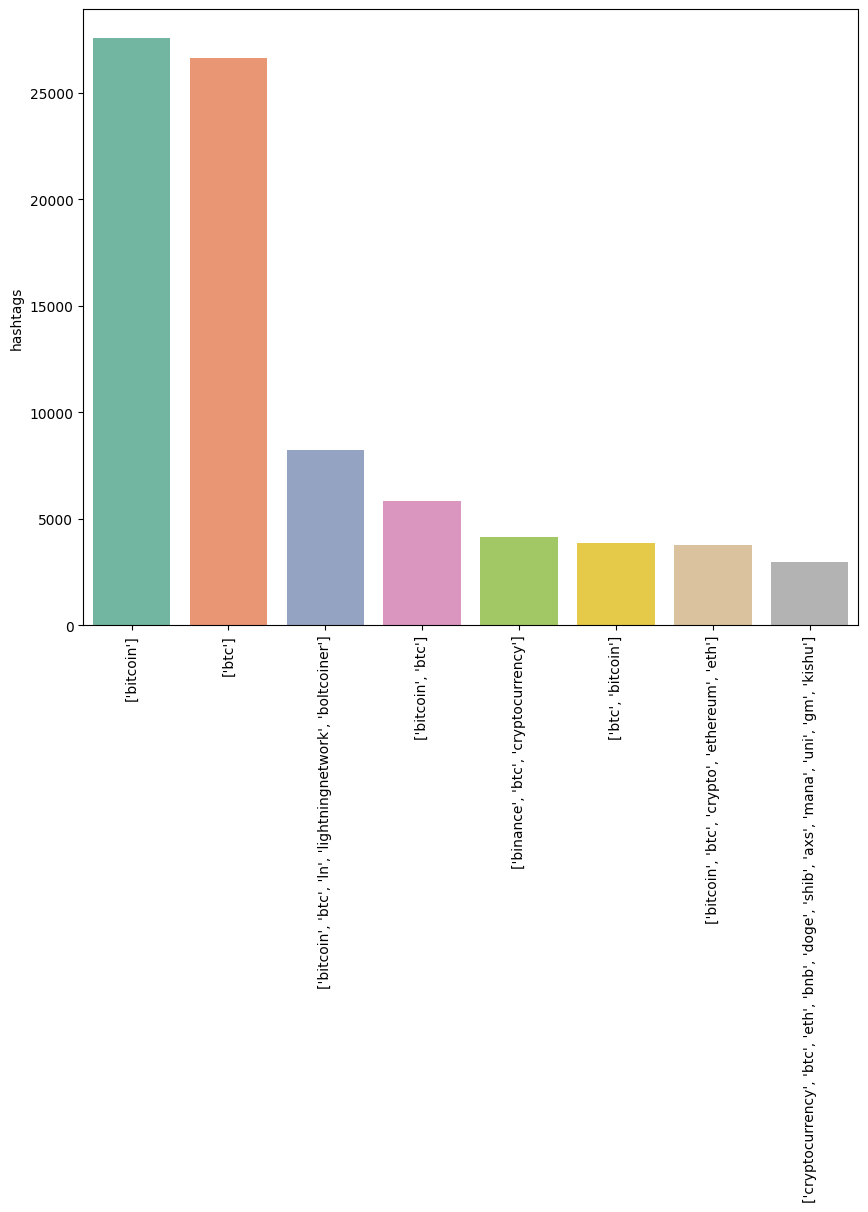

In [31]:
feq = df_clean['hashtags'].value_counts().sort_values(ascending=False)
feq = feq[:8]
plt.figure(figsize=(10,8))
plt.xticks(rotation = 90)
sns.barplot(x=feq.index,y = feq,palette="Set2")

In [32]:
mentionSentiment = []
val = 0
valll = df_clean.head(100)
for i in valll["hashtags"]:
  res = eval(i)
  for k in res:
    isfound = False
    for q in mentionSentiment:
      if k == q["hashtag"]:
        q['compound'] += df_clean["compound"].values[val]
        q['count'] += 1
        isfound = True
    if isfound == False:
      mentionSentiment.append({
  "hashtag": k,
  "compound": df_clean["compound"][val],
  "count" : 1
})
  val += 1

In [33]:
!pip install wordcloud

In [34]:
hashtags_clean = []
for i in df_clean["hashtags"]:
  res = eval(i)
  for i in res:
    hashtags_clean.append(i)
df_hashtags = pd.DataFrame(hashtags_clean, columns=['hashtags'])
df_hashtags.head(10)

hashtags
0   bitcoin
1  ethereum
2  litecoin
3   bitcoin
4    solana
5     matic
6       ada
7   bitcoin
8   bitcoin
9   bitcoin

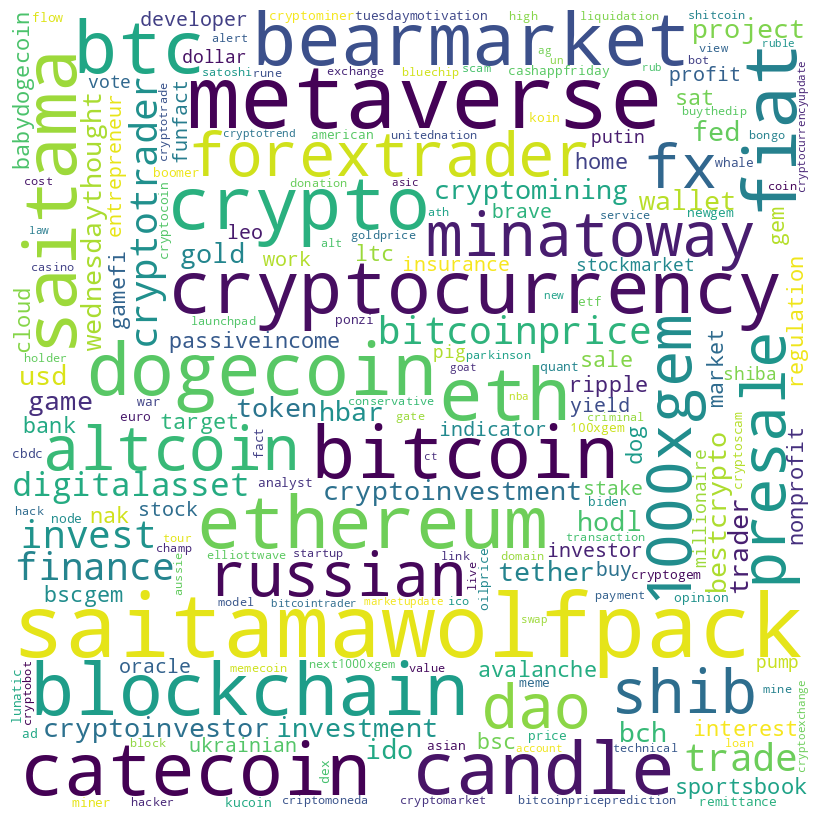

In [35]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)

for val in df_hashtags.hashtags.unique():

    val = str(val)

    tokens = val.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [36]:
sentiList = ['Positive','Negative','Neutral']
hashtags_positive = []
hashtags_negative = []
hashtags_clean = []
for i in df_clean[df_clean["sentiment"]=='Positive']['hashtags']:
  res = eval(i)
  for i in res:
    hashtags_clean.append(i)
positiveDF = pd.DataFrame(hashtags_clean, columns=['hashtags'])
positiveDF.head(10)

hashtags
0         bitcoin
1        ethereum
2        litecoin
3         bitcoin
4         bitcoin
5   coinhuntworld
6  cryptocurrency
7         bitcoin
8          crypto
9         bitcoin

In [37]:
sentiList = ['Positive','Negative','Neutral']
hashtags_positive = []
hashtags_negative = []
hashtags_neutral = []
for k in sentiList:
  for i in df_clean[df_clean["sentiment"]==k]['hashtags']:
    res = eval(i)
    for i in res:
      if(k=="Positive"):
        hashtags_positive.append(i)
      elif(k=="Negative"):
        hashtags_negative.append(i)
      elif(k=="Neutral"):
        hashtags_neutral.append(i)

In [38]:
positiveDF = pd.DataFrame(hashtags_positive, columns=['hashtags'])
positiveDF_unique = positiveDF.hashtags.unique()
positiveDF_unique = pd.DataFrame(positiveDF_unique, columns=['hashtags'])
positiveDF_unique.head(10)

hashtags
0         bitcoin
1        ethereum
2        litecoin
3   coinhuntworld
4  cryptocurrency
5          crypto
6      blockchain
7          kripto
8      kriptopara
9         trading

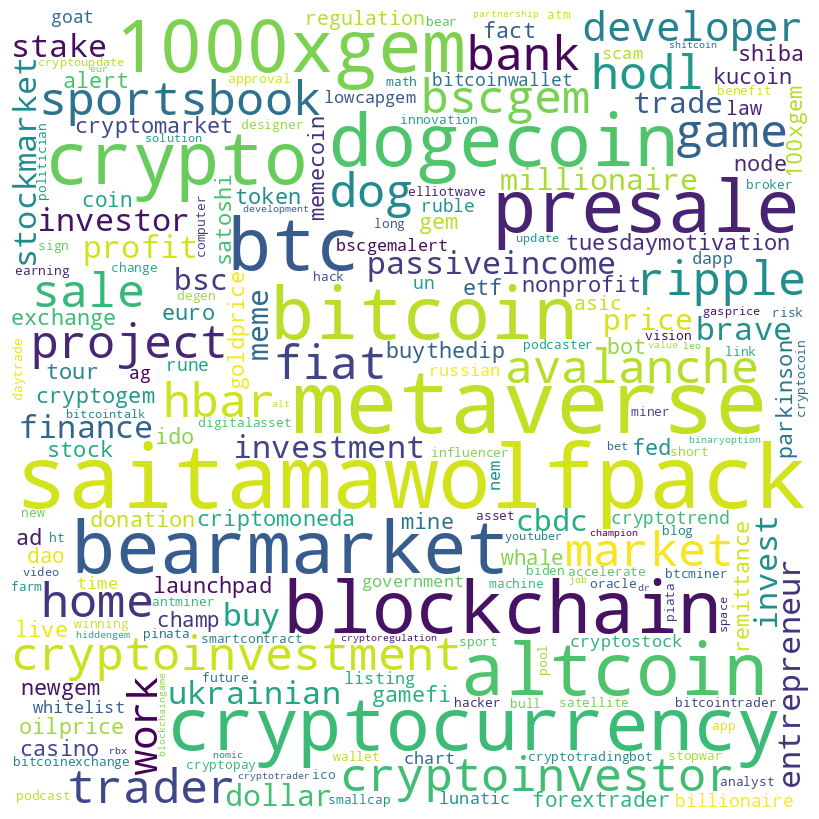

In [39]:
 from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)

for val in positiveDF.hashtags.unique():

    val = str(val)

    tokens = val.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [40]:
negativeDF = pd.DataFrame(hashtags_negative, columns=['hashtags'])
negativeDF_unique = negativeDF.hashtags.unique()
negativeDF_unique = pd.DataFrame(negativeDF_unique, columns=['hashtags'])
negativeDF_unique.head(10)

hashtags
0         bitcoin
1                
2          crypto
3         trading
4             btc
5      blockchain
6        analysis
7            sats
8         russian
9  cryptocurrency

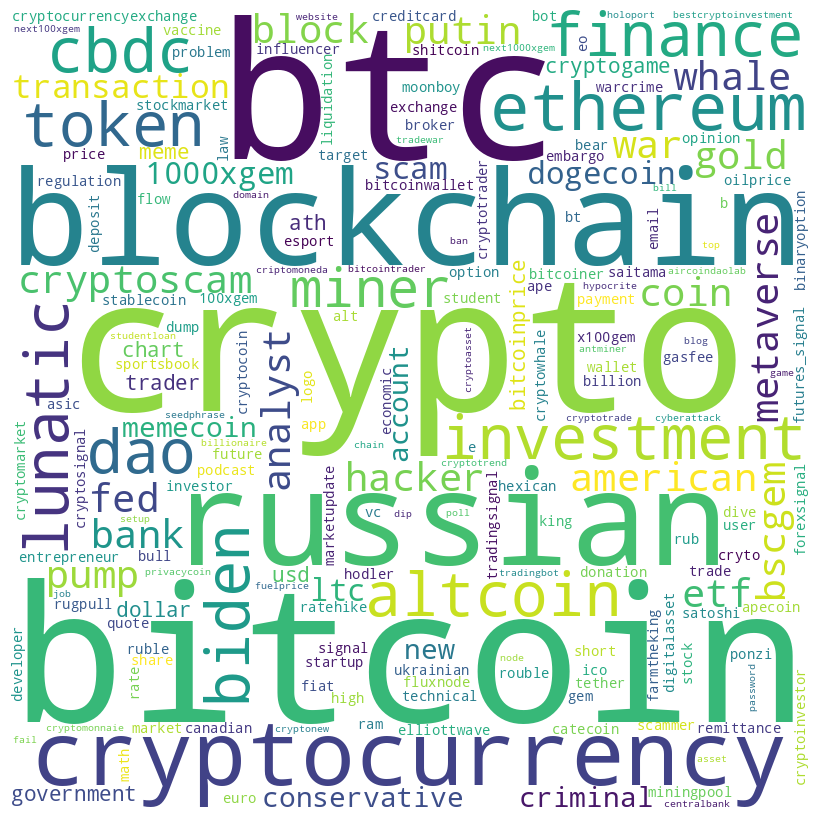

In [41]:
 from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)

for val in negativeDF.hashtags.unique():

    val = str(val)

    tokens = val.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [42]:
neutralDF = pd.DataFrame(hashtags_neutral, columns=['hashtags'])
neutralDF_unique = neutralDF.hashtags.unique()
neutralDF_unique = pd.DataFrame(neutralDF_unique, columns=['hashtags'])
neutralDF_unique.head(10)

hashtags
0     solana
1      matic
2        ada
3    bitcoin
4     mining
5  trxmining
6      money
7  earnmoney
8   register
9   ethereum

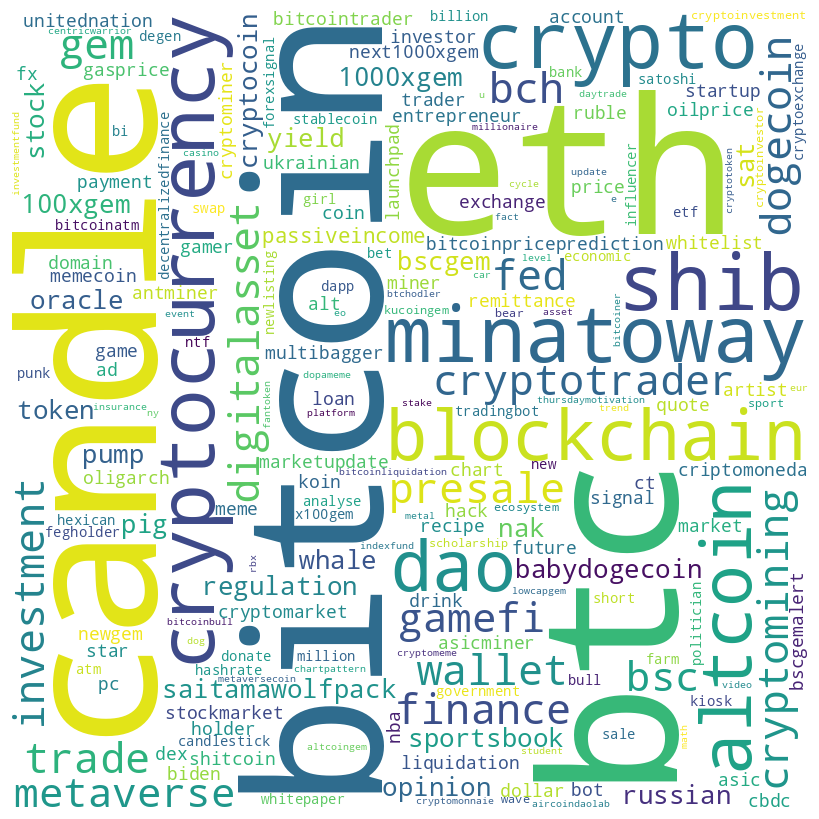

In [43]:

from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)

for val in neutralDF.hashtags.unique():

    val = str(val)

    tokens = val.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

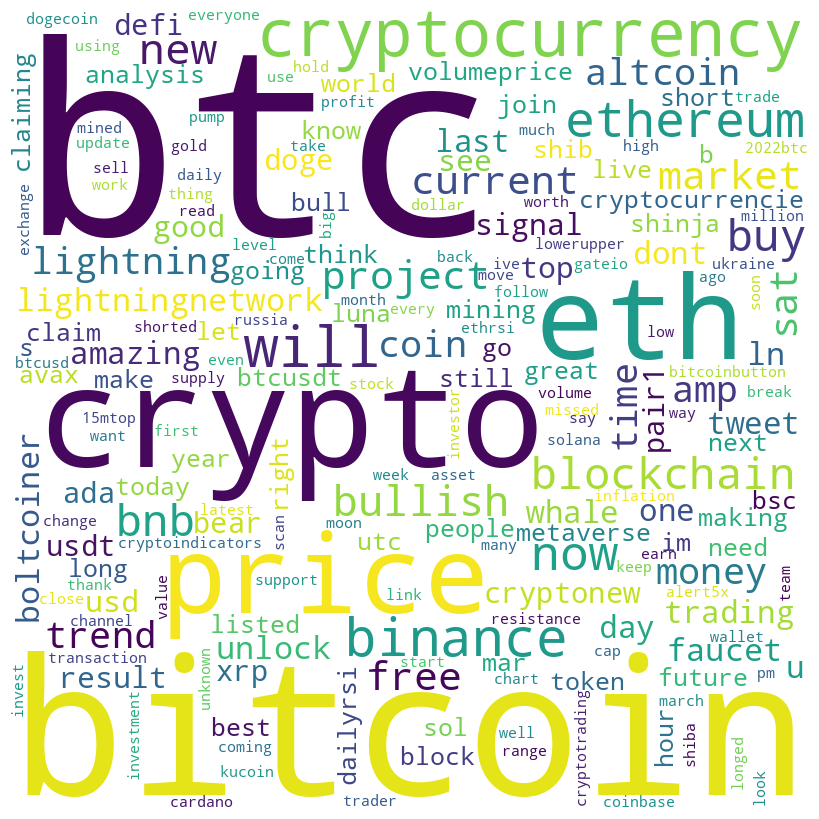

In [44]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(tweet for tweet in df_clean.text)

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10, collocations=False).generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [45]:
dfcop = df_clean.copy()

In [46]:
df_clean['date_time'] = pd.to_datetime(df_clean['date'])
df_clean['date'] = pd.to_datetime(df_clean['date'])

In [47]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224733 entries, 0 to 224732
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_name         224733 non-null  object        
 1   user_location     110156 non-null  object        
 2   user_description  202241 non-null  object        
 3   user_created      224733 non-null  object        
 4   user_followers    224733 non-null  float64       
 5   user_friends      224733 non-null  float64       
 6   user_favourites   224733 non-null  float64       
 7   user_verified     224733 non-null  bool          
 8   date              224733 non-null  datetime64[ns]
 9   text              224733 non-null  object        
 10  hashtags          224733 non-null  object        
 11  source            224733 non-null  object        
 12  is_retweet        224733 non-null  bool          
 13  date_time         224733 non-null  datetime64[ns]
 14  comp

In [48]:
df_clean['date_time'] = df_clean['date_time'].dt.floor('h')
df_clean['date_time'] = df_clean['date_time'].dt.tz_localize(None)
df_clean.head()

user_name    user_location  \
0                                 Ryan de Mateo              NaN   
1                                Gery Rodriguez     Across Space   
2  Blessed Mom of 3 kiddos~I 💗 them so much~🕊️🥀  Albuquerque, NM   
3        The Crypto Curator #BTC100K 🔥 🚀 🏳️‍🌈 🟩   Everywhere ;)    
4                          Hodlers Journey 🍁 ⚡️              NaN   

                                    user_description         user_created  \
0                                                NaN  2019-03-06 11:27:39   
1                                           #Bitcoin  2011-12-23 18:49:39   
2  💜Mom of Doom, G-Ray & CeeJ💜#TheBeKindImpact 💝 ...  2011-06-07 14:40:15   
3  #Bitcoin Evangelist and Aficionado. Military #...  2009-01-17 13:25:27   
4                                           #bitcoin  2021-04-08 18:39:21   

   user_followers  user_friends  user_favourites  user_verified  \
0             3.0         155.0             27.0           True   
1           214.0         234.0           4698.0           True   
2           336.0         878.0          11043.0           True   
3         27860.0       10162.0         139886.0           True   
4           236.0        1126.0            715.0           True   

                 date                                               text  \
0 2022-03-02 23:59:55  create twitter tasks and pay with bitcoin ethe...   
1 2022-03-02 23:59:53  whatever the mainstream media is narrating and...   
2 2022-03-02 23:59:52   solana matic maybe ada but if probably put it...   
3 2022-03-02 23:59:51   congrats have you heard about btc do you have...   
4 2022-03-02 23:59:49   now eliminate the debt and add bitcoin to the...   

                                hashtags               source  is_retweet  \
0    ['bitcoin', 'ethereum', 'litecoin']  Twitter for Android       False   
1                            ['bitcoin']      Twitter Web App       False   
2  ['solana', 'matic', 'ada', 'bitcoin']  Twitter for Android       False   
3                            ['bitcoin']      Twitter Web App       False   
4                            ['bitcoin']   Twitter for iPhone       False   

            date_time  compound sentiment  
0 2022-03-02 23:00:00    0.1779  Positive  
1 2022-03-02 23:00:00   -0.4939  Negative  
2 2022-03-02 23:00:00    0.0000   Neutral  
3 2022-03-02 23:00:00    0.0083   Neutral  
4 2022-03-02 23:00:00    0.5267  Positive

In [49]:
vdf = df_clean.groupby(pd.Grouper(key='date',freq='H')).size().reset_index(name='tweet_vol')
vdf = vdf.reset_index()

In [50]:
vdf= vdf[vdf['tweet_vol'] != 0]

In [51]:
vdf.index = pd.to_datetime(vdf.index)
vdf=vdf.set_index('date')
vdf['tweet_vol'] =vdf['tweet_vol'].astype(float)

In [52]:
vdf.head(12)

index  tweet_vol
date                                 
2022-03-02 16:00:00      0      225.0
2022-03-02 17:00:00      1      695.0
2022-03-02 18:00:00      2      656.0
2022-03-02 19:00:00      3      595.0
2022-03-02 20:00:00      4      528.0
2022-03-02 21:00:00      5      483.0
2022-03-02 22:00:00      6     1026.0
2022-03-02 23:00:00      7     1221.0
2022-03-06 14:00:00     94      152.0
2022-03-06 15:00:00     95      564.0
2022-03-06 16:00:00     96      556.0
2022-03-06 17:00:00     97      496.0

In [53]:
vdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 268 entries, 2022-03-02 16:00:00 to 2022-03-24 23:00:00
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      268 non-null    int64  
 1   tweet_vol  268 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.3 KB


In [54]:
scores = []
counter = 0
for i,index in df_clean.iterrows():
    try:
        scores.append(((int(index["user_followers"]))) * ((int(index["user_favourites"])+1)/int(index['user_followers']+1)) *((int(index["is_retweet"])+1)))
    except:
        scores.append(np.nan)
    counter+=1
    if counter == df_clean.shape[0]:
      break
df_clean['score'] = scores
df_clean = df_clean.drop(['is_retweet','user_favourites','user_followers','user_verified'], axis = 1)
df_clean.head()

user_name    user_location  \
0                                 Ryan de Mateo              NaN   
1                                Gery Rodriguez     Across Space   
2  Blessed Mom of 3 kiddos~I 💗 them so much~🕊️🥀  Albuquerque, NM   
3        The Crypto Curator #BTC100K 🔥 🚀 🏳️‍🌈 🟩   Everywhere ;)    
4                          Hodlers Journey 🍁 ⚡️              NaN   

                                    user_description         user_created  \
0                                                NaN  2019-03-06 11:27:39   
1                                           #Bitcoin  2011-12-23 18:49:39   
2  💜Mom of Doom, G-Ray & CeeJ💜#TheBeKindImpact 💝 ...  2011-06-07 14:40:15   
3  #Bitcoin Evangelist and Aficionado. Military #...  2009-01-17 13:25:27   
4                                           #bitcoin  2021-04-08 18:39:21   

   user_friends                date  \
0         155.0 2022-03-02 23:59:55   
1         234.0 2022-03-02 23:59:53   
2         878.0 2022-03-02 23:59:52   
3       10162.0 2022-03-02 23:59:51   
4        1126.0 2022-03-02 23:59:49   

                                                text  \
0  create twitter tasks and pay with bitcoin ethe...   
1  whatever the mainstream media is narrating and...   
2   solana matic maybe ada but if probably put it...   
3   congrats have you heard about btc do you have...   
4   now eliminate the debt and add bitcoin to the...   

                                hashtags               source  \
0    ['bitcoin', 'ethereum', 'litecoin']  Twitter for Android   
1                            ['bitcoin']      Twitter Web App   
2  ['solana', 'matic', 'ada', 'bitcoin']  Twitter for Android   
3                            ['bitcoin']      Twitter Web App   
4                            ['bitcoin']   Twitter for iPhone   

            date_time  compound sentiment          score  
0 2022-03-02 23:00:00    0.1779  Positive      21.000000  
1 2022-03-02 23:00:00   -0.4939  Negative    4677.144186  
2 2022-03-02 23:00:00    0.0000   Neutral   11011.228487  
3 2022-03-02 23:00:00    0.0083   Neutral  139881.979111  
4 2022-03-02 23:00:00    0.5267  Positive     712.978903

In [55]:
df_clean = df_clean.groupby('date_time').mean()

df_clean = df_clean.reset_index()
df_clean.head()

<ipython-input-55-4169d578eae8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_clean = df_clean.groupby('date_time').mean()


date_time  user_friends  compound        score
0 2022-03-02 16:00:00    997.862222  0.220063  5774.874622
1 2022-03-02 17:00:00   1019.021583  0.160866  6613.906143
2 2022-03-02 18:00:00    694.823171  0.207032  5195.713584
3 2022-03-02 19:00:00    891.139496  0.148643  4886.638511
4 2022-03-02 20:00:00    739.159091  0.162958  4959.100783

In [56]:
df_clean.head()

date_time  user_friends  compound        score
0 2022-03-02 16:00:00    997.862222  0.220063  5774.874622
1 2022-03-02 17:00:00   1019.021583  0.160866  6613.906143
2 2022-03-02 18:00:00    694.823171  0.207032  5195.713584
3 2022-03-02 19:00:00    891.139496  0.148643  4886.638511
4 2022-03-02 20:00:00    739.159091  0.162958  4959.100783

In [57]:
df_clean.index = pd.to_datetime(df_clean.index)
df_clean.head()

date_time  user_friends  compound  \
1970-01-01 00:00:00.000000000 2022-03-02 16:00:00    997.862222  0.220063   
1970-01-01 00:00:00.000000001 2022-03-02 17:00:00   1019.021583  0.160866   
1970-01-01 00:00:00.000000002 2022-03-02 18:00:00    694.823171  0.207032   
1970-01-01 00:00:00.000000003 2022-03-02 19:00:00    891.139496  0.148643   
1970-01-01 00:00:00.000000004 2022-03-02 20:00:00    739.159091  0.162958   

                                     score  
1970-01-01 00:00:00.000000000  5774.874622  
1970-01-01 00:00:00.000000001  6613.906143  
1970-01-01 00:00:00.000000002  5195.713584  
1970-01-01 00:00:00.000000003  4886.638511  
1970-01-01 00:00:00.000000004  4959.100783

In [58]:
df_clean['date_time'] = pd.to_datetime(df_clean['date_time'])
df = df_clean.set_index(pd.DatetimeIndex(df_clean['date_time']))
df.head()

date_time  user_friends  compound        score
date_time                                                                   
2022-03-02 16:00:00 2022-03-02 16:00:00    997.862222  0.220063  5774.874622
2022-03-02 17:00:00 2022-03-02 17:00:00   1019.021583  0.160866  6613.906143
2022-03-02 18:00:00 2022-03-02 18:00:00    694.823171  0.207032  5195.713584
2022-03-02 19:00:00 2022-03-02 19:00:00    891.139496  0.148643  4886.638511
2022-03-02 20:00:00 2022-03-02 20:00:00    739.159091  0.162958  4959.100783

In [59]:
df['tweet_vol'] = vdf['tweet_vol']

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 268 entries, 2022-03-02 16:00:00 to 2022-03-24 23:00:00
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date_time     268 non-null    datetime64[ns]
 1   user_friends  268 non-null    float64       
 2   compound      268 non-null    float64       
 3   score         268 non-null    float64       
 4   tweet_vol     268 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 12.6 KB


In [60]:
df_bitcoin = pd.read_csv("new_file.csv")

In [61]:
df_bitcoin['date'] = pd.to_datetime(df_bitcoin['date'])
df_bitcoin = df_bitcoin.set_index(pd.DatetimeIndex(df_bitcoin['date']))

In [62]:
df_bitcoin = df_bitcoin.drop(['date'], axis=1)

In [63]:
df_bitcoin.head()

unix   symbol     open     high      low    close  \
date                                                                           
2023-09-21 00:00:00  1695254400  BTC/USD  27124.0  27124.0  27101.0  27119.0   
2023-09-20 23:00:00  1695250800  BTC/USD  27098.0  27158.0  27078.0  27128.0   
2023-09-20 22:00:00  1695247200  BTC/USD  27118.0  27128.0  27057.0  27101.0   
2023-09-20 21:00:00  1695243600  BTC/USD  27089.0  27235.0  27068.0  27107.0   
2023-09-20 20:00:00  1695240000  BTC/USD  26950.0  27089.0  26933.0  27089.0   

                     Volume BTC    Volume USD  
date                                           
2023-09-21 00:00:00    0.441151  1.196357e+04  
2023-09-20 23:00:00  126.105172  3.420981e+06  
2023-09-20 22:00:00   17.074215  4.627283e+05  
2023-09-20 21:00:00   75.489819  2.046303e+06  
2023-09-20 20:00:00   56.922798  1.541982e+06

In [64]:
merged_df = pd.merge(df,df_bitcoin, how='inner',left_index=True, right_index=True)

In [65]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 268 entries, 2022-03-02 16:00:00 to 2022-03-24 23:00:00
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date_time     268 non-null    datetime64[ns]
 1   user_friends  268 non-null    float64       
 2   compound      268 non-null    float64       
 3   score         268 non-null    float64       
 4   tweet_vol     268 non-null    float64       
 5   unix          268 non-null    int64         
 6   symbol        268 non-null    object        
 7   open          268 non-null    float64       
 8   high          268 non-null    float64       
 9   low           268 non-null    float64       
 10  close         268 non-null    float64       
 11  Volume BTC    268 non-null    float64       
 12  Volume USD    268 non-null    float64       
dtypes: datetime64[ns](1), float64(10), int64(1), object(1)
memory usage: 29.3+ KB


In [66]:
merged_df = merged_df.drop(['unix', 'symbol'], axis=1)
merged_df.tail()

date_time  user_friends  compound        score  \
2022-03-24 19:00:00 2022-03-24 19:00:00   1289.541247  0.161492  7682.799608   
2022-03-24 20:00:00 2022-03-24 20:00:00    896.793103  0.159845  6703.163671   
2022-03-24 21:00:00 2022-03-24 21:00:00    963.998728  0.163551  7830.732409   
2022-03-24 22:00:00 2022-03-24 22:00:00    995.040462  0.194985  7258.478307   
2022-03-24 23:00:00 2022-03-24 23:00:00   1046.042995  0.175582  7837.902226   

                     tweet_vol      open      high       low     close  \
2022-03-24 19:00:00     1988.0  44003.33  44119.58  43920.43  43948.31   
2022-03-24 20:00:00     1624.0  43953.46  43979.53  43832.39  43905.74   
2022-03-24 21:00:00     1572.0  43900.80  44075.35  43837.82  44067.53   
2022-03-24 22:00:00     1384.0  44067.48  44117.71  43938.28  43975.17   
2022-03-24 23:00:00     1349.0  43990.37  44029.79  43901.72  44025.99   

                     Volume BTC    Volume USD  
2022-03-24 19:00:00   63.958485  2.810867e+06  
2022-03-24 20:00:00   30.134266  1.323067e+06  
2022-03-24 21:00:00   28.403492  1.251672e+06  
2022-03-24 22:00:00   37.912843  1.667224e+06  
2022-03-24 23:00:00   25.784665  1.135195e+06

In [67]:
merged_df.describe()

user_friends    compound         score    tweet_vol          open  \
count    268.000000  268.000000    268.000000   268.000000    268.000000   
mean     800.530715    0.172924   5277.651444   838.555970  40865.115000   
std      173.538147    0.041501   1584.057555   500.186445   1656.558624   
min      436.000000    0.050758   2452.647491     2.000000  37325.310000   
25%      663.855069    0.147668   4172.850967   528.750000  39243.180000   
50%      777.288868    0.170798   4880.163587   655.500000  41075.075000   
75%      924.181453    0.189937   6259.556998  1009.500000  42037.692500   
max     1412.975818    0.375300  10946.246721  2898.000000  44278.140000   

               high           low         close  Volume BTC    Volume USD  
count    268.000000    268.000000    268.000000  268.000000  2.680000e+02  
mean   41054.617687  40671.757537  40867.011418   85.263962  3.479155e+06  
std     1633.191740   1680.445584   1664.868674   88.097236  3.583216e+06  
min    37778.150000  37169.520000  37321.410000    7.315909  3.051518e+05  
25%    39476.877500  39013.490000  39246.852500   32.655830  1.324946e+06  
50%    41234.325000  40878.625000  41058.635000   58.195961  2.365144e+06  
75%    42227.532500  41852.980000  42048.300000   98.629351  4.033211e+06  
max    44501.000000  43990.630000  44274.810000  592.691513  2.373461e+07

In [68]:
cor = merged_df.corr()
cor

<ipython-input-68-2d00d38ec407>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = merged_df.corr()


user_friends  compound     score  tweet_vol      open      high  \
user_friends      1.000000  0.069678  0.520386   0.478028  0.208353  0.213987   
compound          0.069678  1.000000 -0.105704  -0.051950  0.277846  0.269063   
score             0.520386 -0.105704  1.000000   0.608927  0.180007  0.191562   
tweet_vol         0.478028 -0.051950  0.608927   1.000000  0.218851  0.242956   
open              0.208353  0.277846  0.180007   0.218851  1.000000  0.994517   
high              0.213987  0.269063  0.191562   0.242956  0.994517  1.000000   
low               0.223503  0.297003  0.191678   0.214376  0.993715  0.991884   
close             0.224414  0.282260  0.193943   0.234755  0.989291  0.993656   
Volume BTC        0.082095 -0.143812  0.086533   0.424654 -0.049011  0.004577   
Volume USD        0.095871 -0.133365  0.098027   0.437908 -0.014417  0.039510   

                   low     close  Volume BTC  Volume USD  
user_friends  0.223503  0.224414    0.082095    0.095871  
compound      0.297003  0.282260   -0.143812   -0.133365  
score         0.191678  0.193943    0.086533    0.098027  
tweet_vol     0.214376  0.234755    0.424654    0.437908  
open          0.993715  0.989291   -0.049011   -0.014417  
high          0.991884  0.993656    0.004577    0.039510  
low           1.000000  0.996087   -0.084683   -0.049014  
close         0.996087  1.000000   -0.036464   -0.000312  
Volume BTC   -0.084683 -0.036464    1.000000    0.998896  
Volume USD   -0.049014 -0.000312    0.998896    1.000000

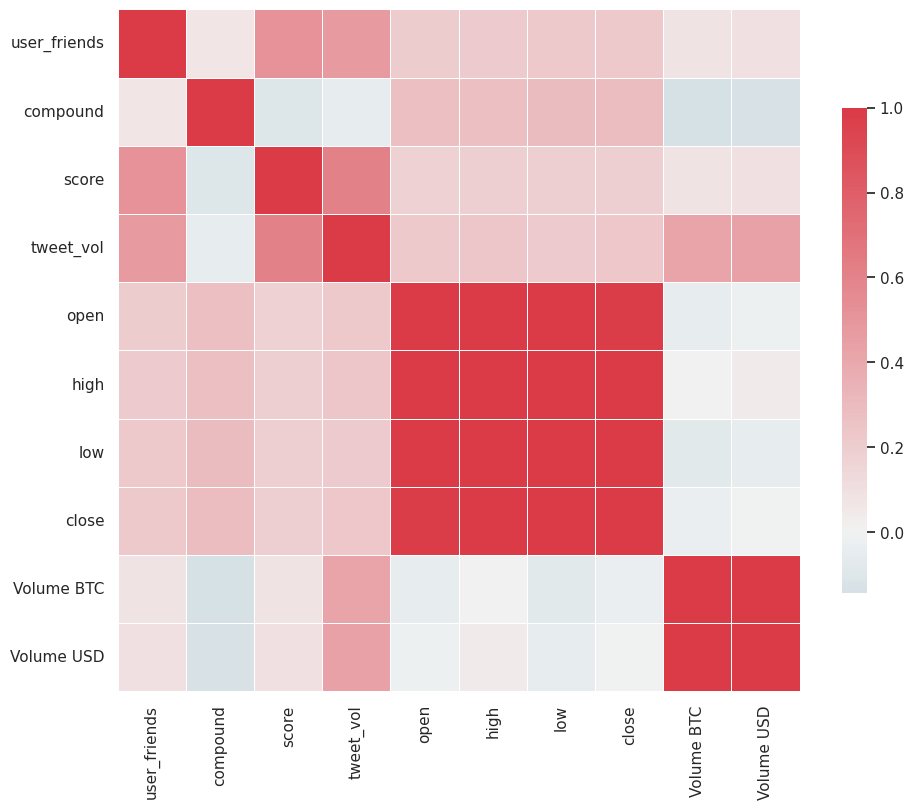

In [69]:
import matplotlib.pyplot as plt
sns.set(style="white")
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax =sns.heatmap(cor, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})
plt.show()

In [70]:
merged_df.head()

date_time  user_friends  compound        score  \
2022-03-02 16:00:00 2022-03-02 16:00:00    997.862222  0.220063  5774.874622   
2022-03-02 17:00:00 2022-03-02 17:00:00   1019.021583  0.160866  6613.906143   
2022-03-02 18:00:00 2022-03-02 18:00:00    694.823171  0.207032  5195.713584   
2022-03-02 19:00:00 2022-03-02 19:00:00    891.139496  0.148643  4886.638511   
2022-03-02 20:00:00 2022-03-02 20:00:00    739.159091  0.162958  4959.100783   

                     tweet_vol      open      high       low     close  \
2022-03-02 16:00:00      225.0  44083.23  44501.00  43990.63  44274.81   
2022-03-02 17:00:00      695.0  44278.14  44442.68  43730.40  43828.80   
2022-03-02 18:00:00      656.0  43824.13  43961.02  43573.33  43621.93   
2022-03-02 19:00:00      595.0  43621.93  43848.50  43462.52  43729.40   
2022-03-02 20:00:00      528.0  43729.45  43908.80  43711.82  43838.88   

                     Volume BTC    Volume USD  
2022-03-02 16:00:00  119.981379  5.312153e+06  
2022-03-02 17:00:00   80.074610  3.509574e+06  
2022-03-02 18:00:00   45.818687  1.998700e+06  
2022-03-02 19:00:00   59.078904  2.583485e+06  
2022-03-02 20:00:00   49.069988  2.151173e+06

In [71]:
final_df = merged_df.drop(['open','high','low', 'Volume USD'], axis = 1)

In [72]:
final_df = final_df[['close','compound','Volume BTC','tweet_vol','score']]
final_df.head()

close  compound  Volume BTC  tweet_vol        score
2022-03-02 16:00:00  44274.81  0.220063  119.981379      225.0  5774.874622
2022-03-02 17:00:00  43828.80  0.160866   80.074610      695.0  6613.906143
2022-03-02 18:00:00  43621.93  0.207032   45.818687      656.0  5195.713584
2022-03-02 19:00:00  43729.40  0.148643   59.078904      595.0  4886.638511
2022-03-02 20:00:00  43838.88  0.162958   49.069988      528.0  4959.100783

In [73]:
final_df.to_csv('final_df.csv')

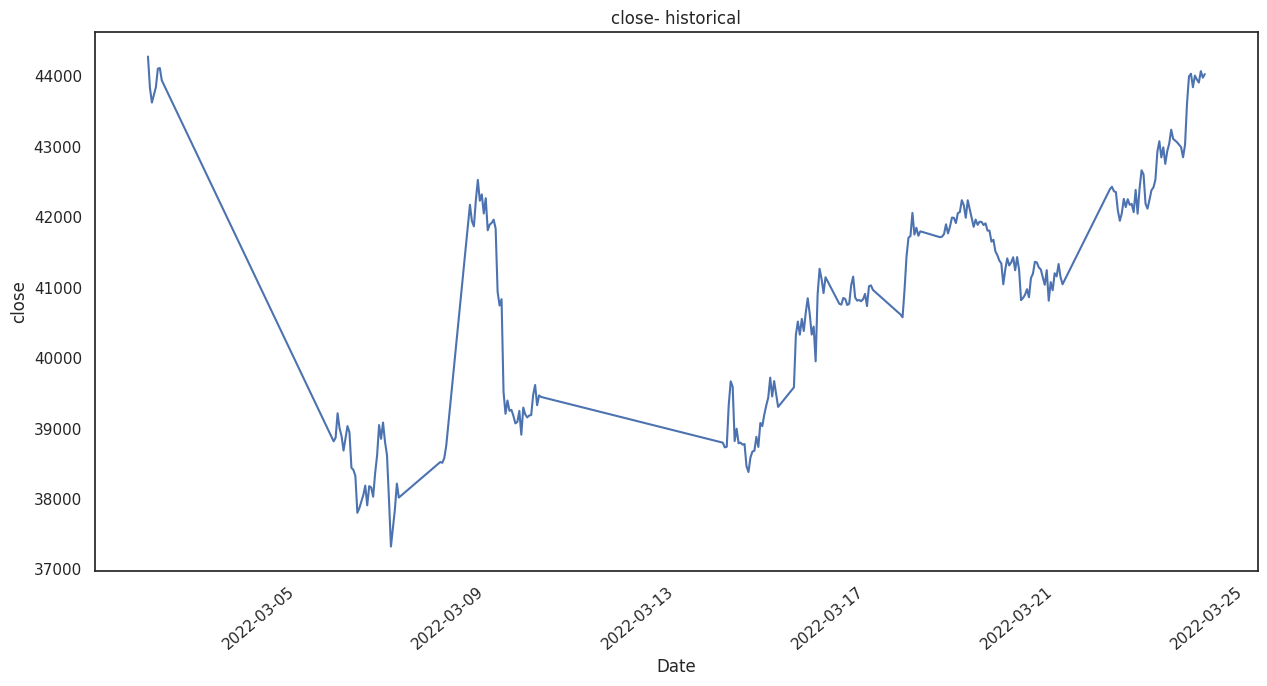

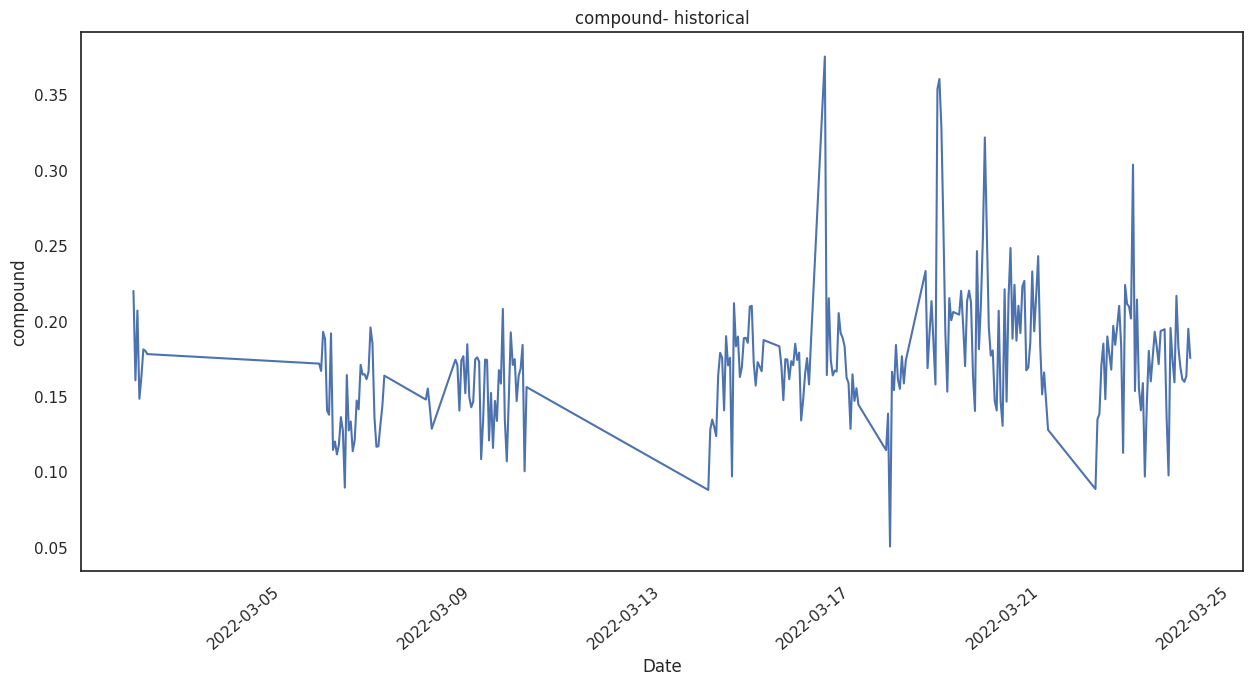

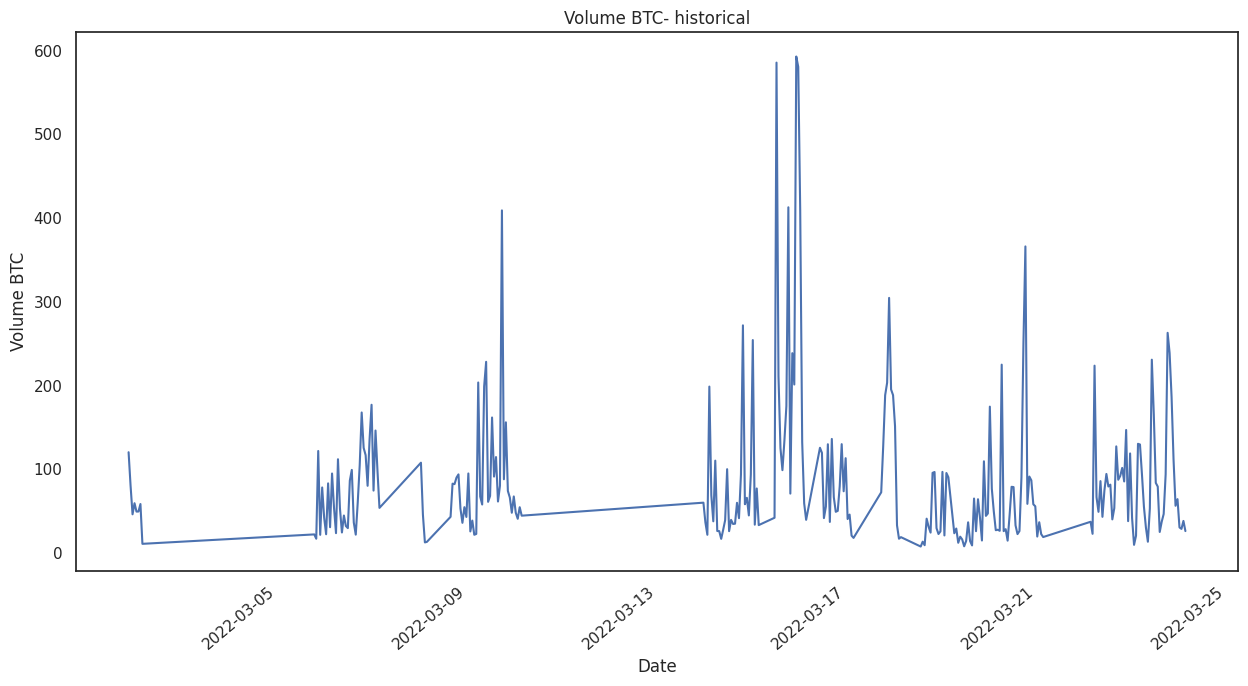

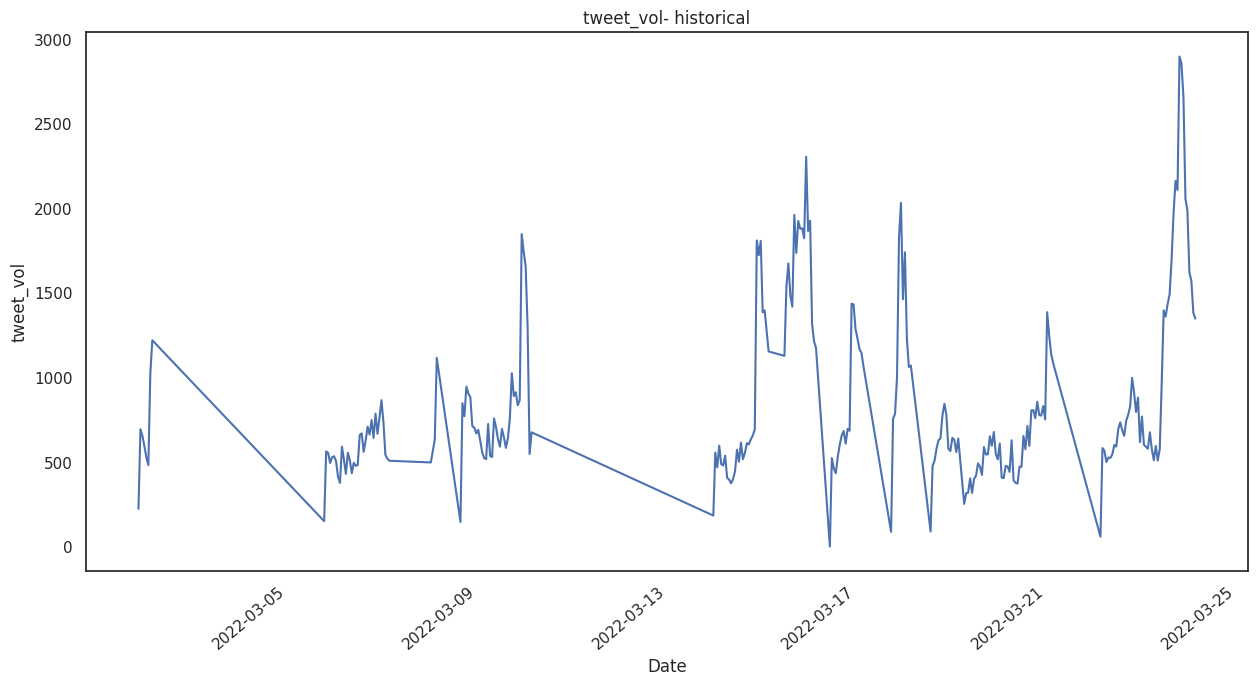

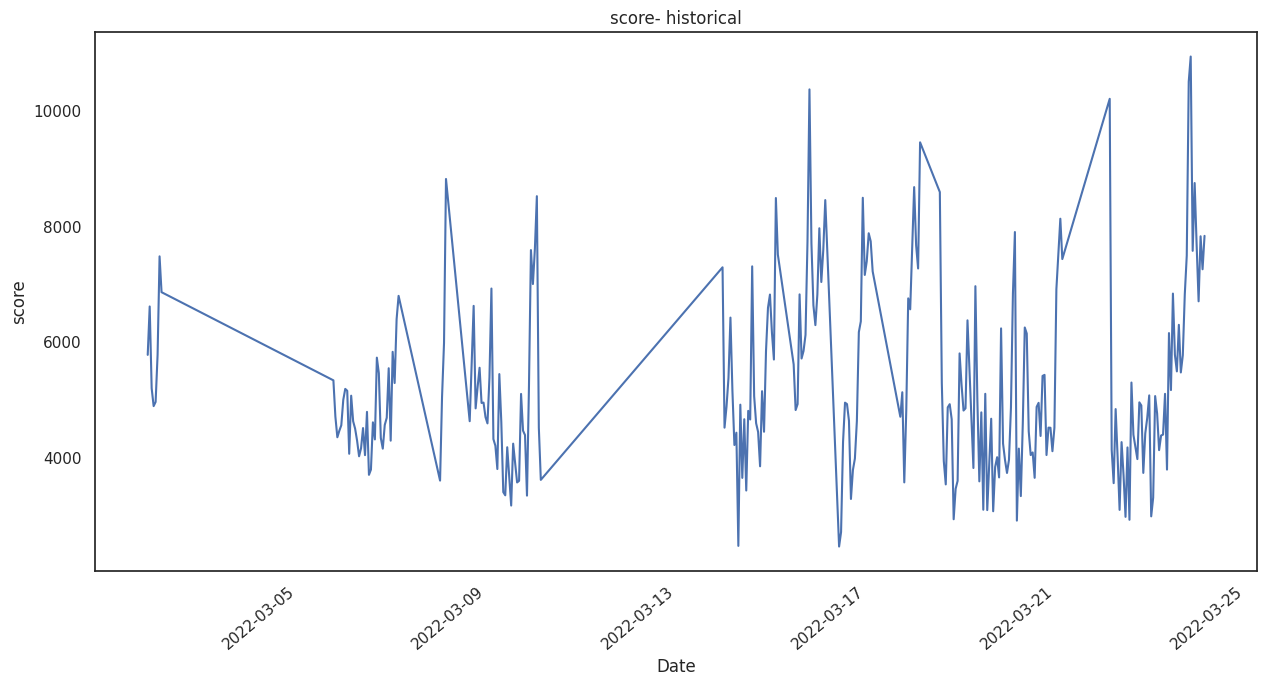

In [74]:
index_list = ['close','compound','Volume BTC', 'tweet_vol', 'score']
for i in index_list:
  plt.figure(figsize=(15,7))
  plt.plot(final_df[i])
  plt.xticks(rotation=40)
  plt.xlabel('Date')
  plt.ylabel(i)
  plt.title(i+'- historical')
  plt.show()

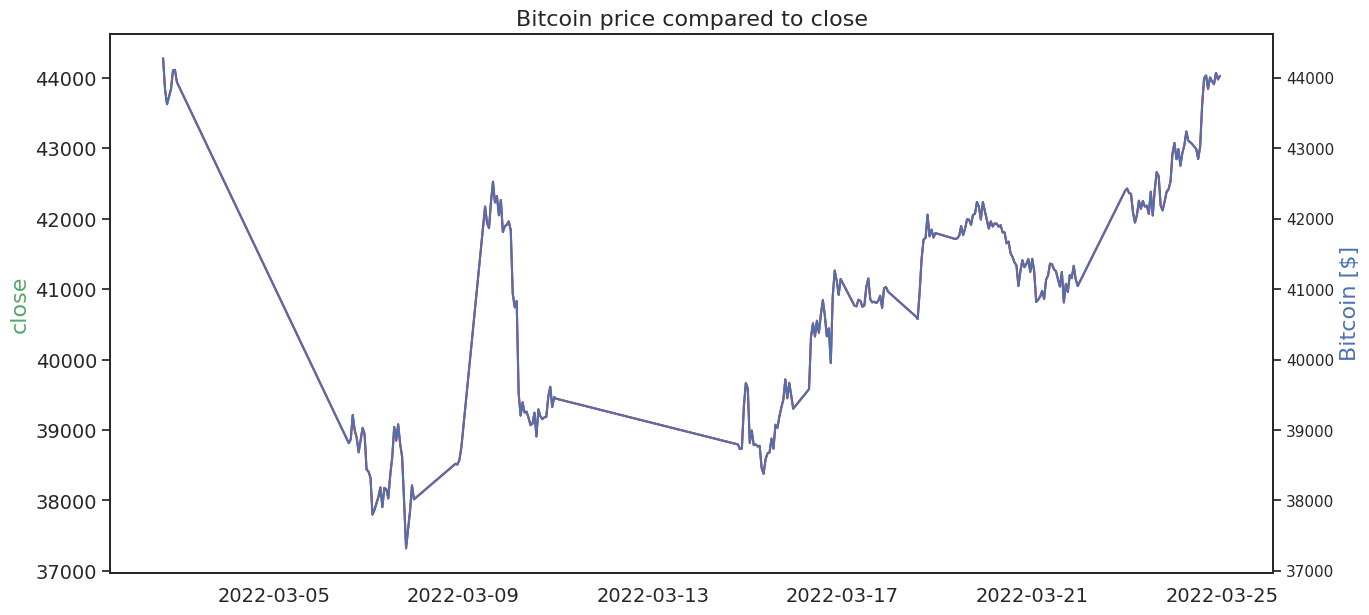

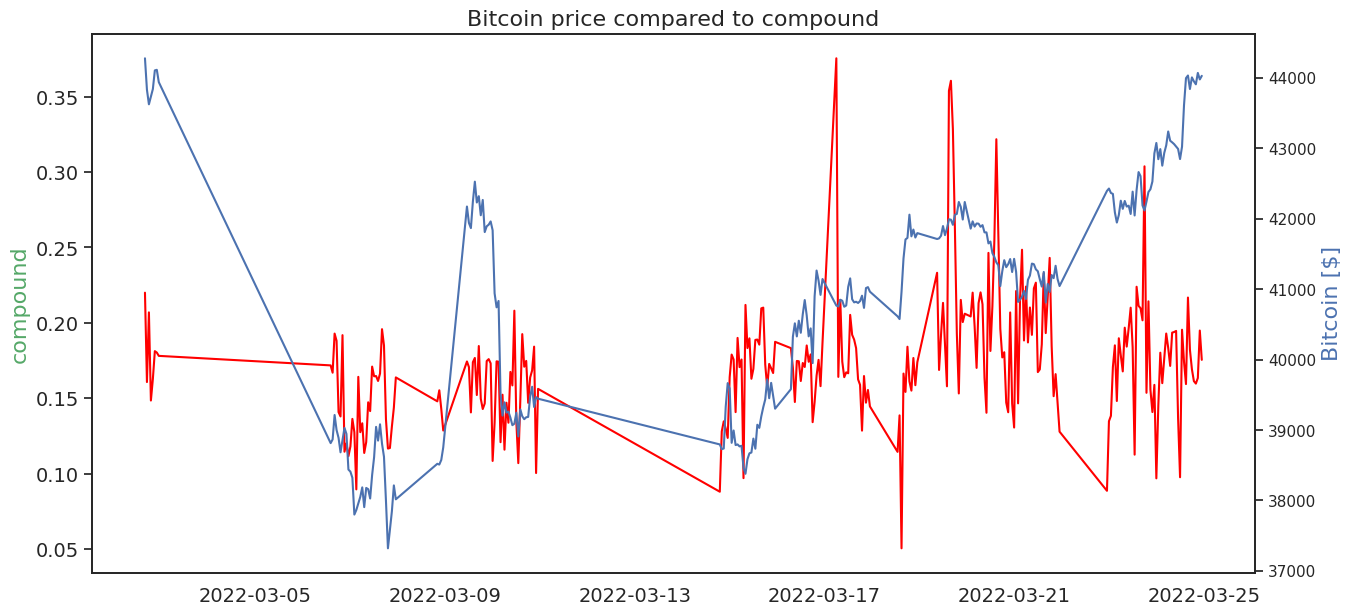

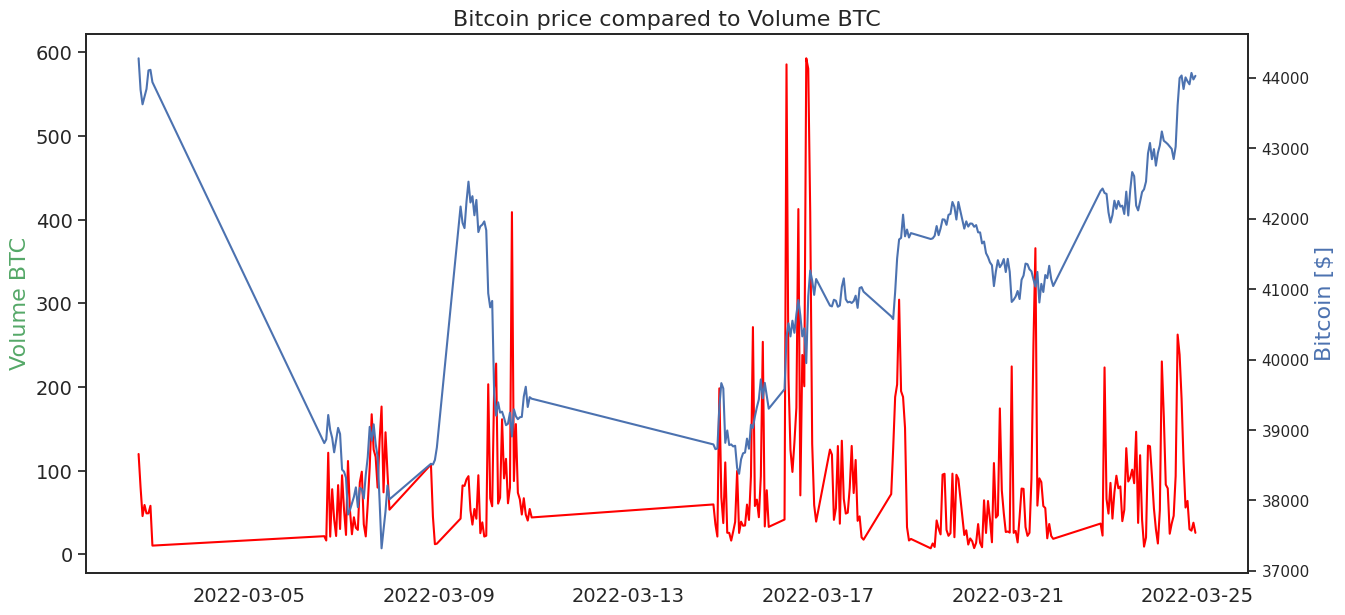

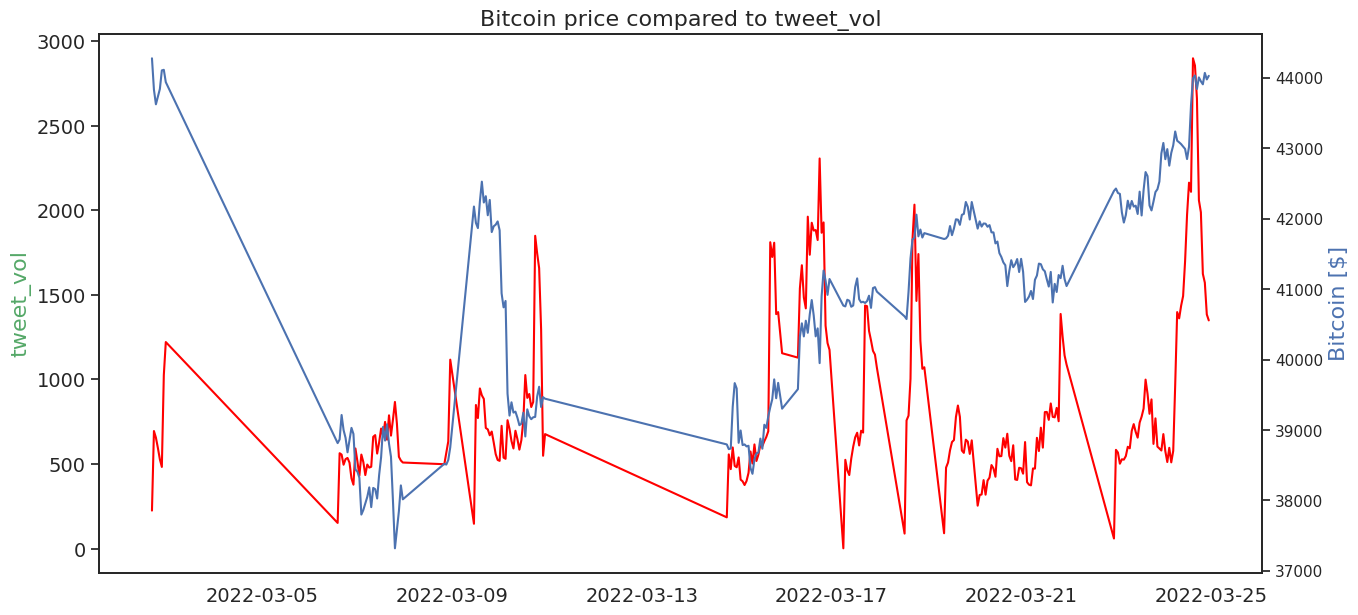

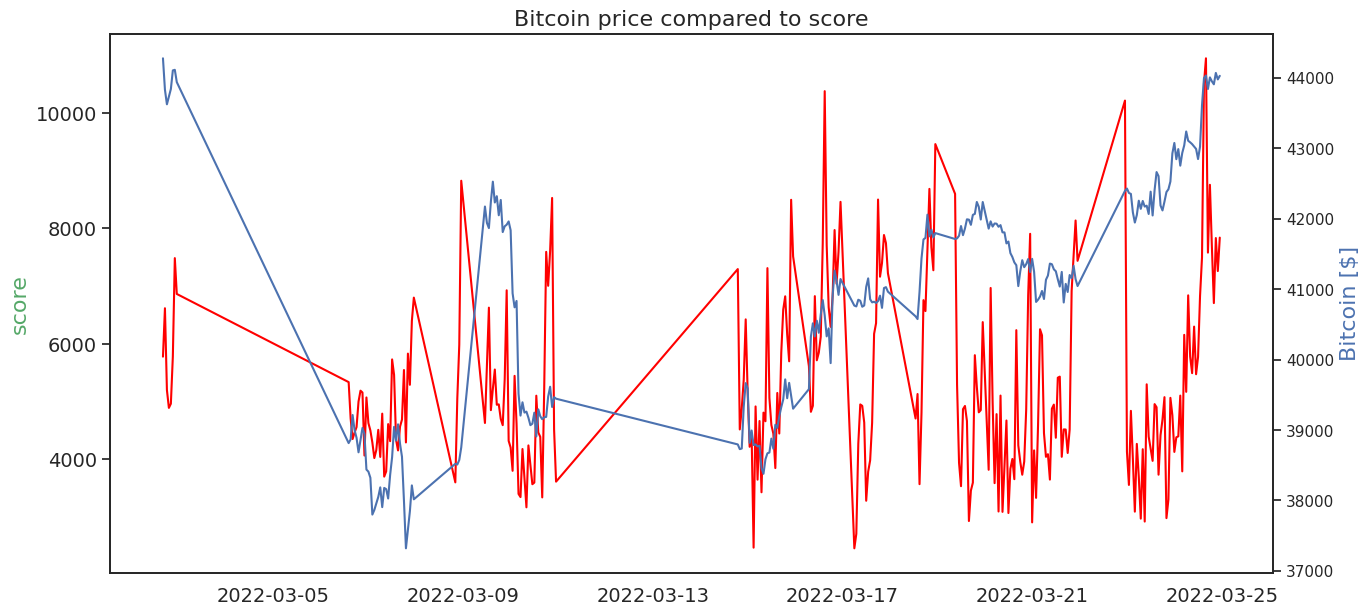

In [75]:
for i in index_list:
  fig, ax1 = plt.subplots(figsize=(15,7))
  ax1.set_title("Bitcoin price compared to "+i, fontsize=16)
  ax1.tick_params(labelsize=14)
  ax2 = ax1.twinx()
  ax1.plot_date(final_df[i].index, final_df[i], 'red')
  ax2.plot_date(final_df['close'].index, final_df['close'], 'b')

  ax1.set_ylabel(i, color='g', fontsize=16)
  ax2.set_ylabel("Bitcoin [$]", color='b', fontsize=16)
  plt.show()

In [76]:
import numpy as np
from math import sqrt
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from pandas import concat
from keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from keras.layers import LSTM
from tensorflow.keras import regularizers

In [77]:
data = final_df

train_size = int(len(data) * 0.5)
train_data_S = data[:train_size]
test_data_S = data[train_size:]

scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data_S)
test_data=  scaler.fit_transform(test_data_S)

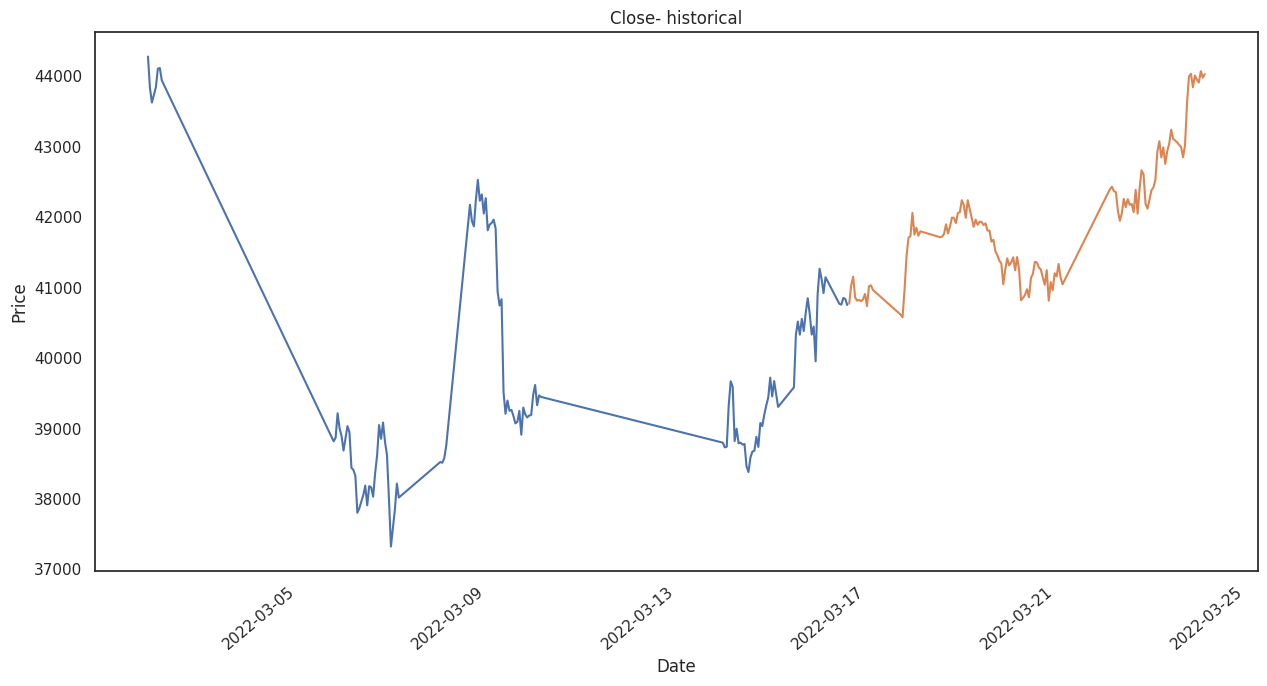

In [78]:
plt.figure(figsize=(15,7))
plt.plot(train_data_S['close'])
plt.plot(test_data_S['close'])
plt.xticks(rotation=40)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close'+'- historical')
plt.show()

In [79]:
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data)-look_back):
        X.append(data[i:(i+look_back), :])
        Y.append(data[i+look_back, 0])
    return np.array(X), np.array(Y)

look_back = 5
train_X, train_Y = create_dataset(train_data, look_back)
test_X, test_Y = create_dataset(test_data, look_back)

In [80]:
num_features = data.shape[1]
lstm_input_shape = (look_back, num_features)

train_X = np.reshape(train_X, (train_X.shape[0], look_back, num_features))
test_X = np.reshape(test_X, (test_X.shape[0], look_back, num_features))

print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(129, 5, 5) (129,) (129, 5, 5) (129,)


In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, GRU
from tensorflow.keras.metrics import MeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping
from tqdm import tqdm

In [82]:
'''
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
def create_model(dropout_rate1=0.0, dropout_rate2=0.0, dropout_rate3=0.0):
    model = Sequential()
    model.add(LSTM(units=64, input_shape=(look_back, num_features)))
    model.add(Dropout(dropout_rate1))
    model.add(Dense(64))
    model.add(Dropout(dropout_rate2))
    model.add(Dense(64))
    model.add(Dropout(dropout_rate3))
    model.add(Dense(64))
    model.compile(loss='mae', optimizer='adam')
    return model

batch_size_list = [16]
for i in tqdm(batch_size_list):
  # Create the KerasRegressor wrapper for Grid Search
  model = KerasRegressor(build_fn=create_model, epochs=75, batch_size=i, verbose=0)

  # Define the parameter grid for Grid Search
  param_grid = {'dropout_rate1': [0.0, 0.1, 0.2, 0.4, 0.6],
              'dropout_rate2': [0.0, 0.1, 0.2, 0.4, 0.6],
              'dropout_rate3': [0.0, 0.1, 0.2, 0.4, 0.6]}

  # Perform Grid Search with error_score='raise'
  grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, error_score='raise')
  grid_result = grid.fit(train_X, train_Y)

  # Print the best results
  print("Best results: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
'''

'\nfrom tensorflow.keras.wrappers.scikit_learn import KerasRegressor\ndef create_model(dropout_rate1=0.0, dropout_rate2=0.0, dropout_rate3=0.0):\n    model = Sequential()\n    model.add(LSTM(units=64, input_shape=(look_back, num_features)))\n    model.add(Dropout(dropout_rate1))\n    model.add(Dense(64))\n    model.add(Dropout(dropout_rate2))\n    model.add(Dense(64))\n    model.add(Dropout(dropout_rate3))\n    model.add(Dense(64))\n    model.compile(loss=\'mae\', optimizer=\'adam\')\n    return model\n\nbatch_size_list = [16]\nfor i in tqdm(batch_size_list):\n  # Create the KerasRegressor wrapper for Grid Search\n  model = KerasRegressor(build_fn=create_model, epochs=75, batch_size=i, verbose=0)\n\n  # Define the parameter grid for Grid Search\n  param_grid = {\'dropout_rate1\': [0.0, 0.1, 0.2, 0.4, 0.6],\n              \'dropout_rate2\': [0.0, 0.1, 0.2, 0.4, 0.6],\n              \'dropout_rate3\': [0.0, 0.1, 0.2, 0.4, 0.6]}\n\n  # Perform Grid Search with error_score=\'raise\'\n  gri

In [83]:
# The GRU architecture
model_GRU = Sequential()

model_GRU.add(GRU(units=64, return_sequences=True, input_shape=(look_back, num_features)))
model_GRU.add(Dropout(0.1))

model_GRU.add(GRU(units=64, return_sequences=True, input_shape=(look_back, num_features)))
model_GRU.add(Dropout(0.1))

model_GRU.add(GRU(units=64, return_sequences=True, input_shape=(look_back, num_features)))
model_GRU.add(Dropout(0.1))

model_GRU.add(GRU(units=64))
model_GRU.add(Dropout(0.1))

model_GRU.add(Dense(units=1))

model_GRU.compile(optimizer='adam', loss='mean_squared_error')
# Define early stopping callback
early_stopping = EarlyStopping(patience=10, monitor='val_loss', restore_best_weights=True)

# Train the model
history = model_GRU.fit(train_X, train_Y, validation_data=(test_X, test_Y), epochs=150, callbacks=[early_stopping], shuffle=False, verbose=2, validation_split = 0.1)

Epoch 1/150
5/5 - 11s - loss: 0.0939 - val_loss: 0.0397 - 11s/epoch - 2s/step
Epoch 2/150
5/5 - 0s - loss: 0.0488 - val_loss: 0.0394 - 157ms/epoch - 31ms/step
Epoch 3/150
5/5 - 0s - loss: 0.0319 - val_loss: 0.0500 - 114ms/epoch - 23ms/step
Epoch 4/150
5/5 - 0s - loss: 0.0311 - val_loss: 0.0411 - 114ms/epoch - 23ms/step
Epoch 5/150
5/5 - 0s - loss: 0.0257 - val_loss: 0.0310 - 125ms/epoch - 25ms/step
Epoch 6/150
5/5 - 0s - loss: 0.0283 - val_loss: 0.0277 - 126ms/epoch - 25ms/step
Epoch 7/150
5/5 - 0s - loss: 0.0233 - val_loss: 0.0281 - 121ms/epoch - 24ms/step
Epoch 8/150
5/5 - 0s - loss: 0.0207 - val_loss: 0.0206 - 131ms/epoch - 26ms/step
Epoch 9/150
5/5 - 0s - loss: 0.0192 - val_loss: 0.0171 - 123ms/epoch - 25ms/step
Epoch 10/150
5/5 - 0s - loss: 0.0192 - val_loss: 0.0158 - 117ms/epoch - 23ms/step
Epoch 11/150
5/5 - 0s - loss: 0.0207 - val_loss: 0.0148 - 129ms/epoch - 26ms/step
Epoch 12/150
5/5 - 0s - loss: 0.0194 - val_loss: 0.0138 - 127ms/epoch - 25ms/step
Epoch 13/150
5/5 - 0s - loss

In [84]:
model_GRU.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 5, 64)             13632     
                                                                 
 dropout (Dropout)           (None, 5, 64)             0         
                                                                 
 gru_1 (GRU)                 (None, 5, 64)             24960     
                                                                 
 dropout_1 (Dropout)         (None, 5, 64)             0         
                                                                 
 gru_2 (GRU)                 (None, 5, 64)             24960     
                                                                 
 dropout_2 (Dropout)         (None, 5, 64)             0         
                                                                 
 gru_3 (GRU)                 (None, 64)                2

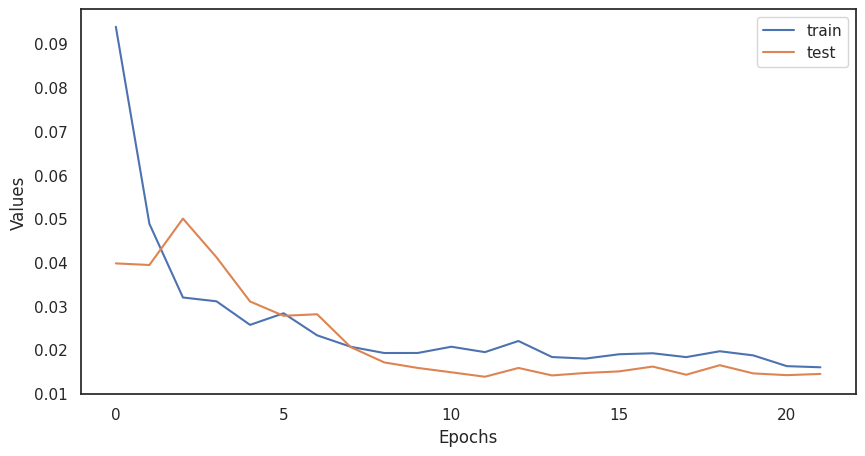

In [85]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.legend()
plt.show()

In [86]:
from sklearn.metrics import mean_squared_error
import math

test_predictions = model_GRU.predict(test_X)
train_predictions = model_GRU.predict(train_X)
test_mse = mean_squared_error(test_Y, test_predictions)
test_rmse = math.sqrt(test_mse)

print('Test MSE: {:.4f}'.format(test_mse))
print('Test RMSE: {:.4f}'.format(test_rmse))

5/5 [==============================] - 0s 6ms/step
Test MSE: 0.0138
Test RMSE: 0.1175


In [87]:
print("Test data R2 score:", r2_score(test_Y, test_predictions))
print("Train data R2 score:", r2_score(train_Y, train_predictions))

Test data R2 score: 0.7745096553149202
Train data R2 score: 0.5667683363228824


In [88]:
test_X = test_X.reshape((test_X.shape[0],look_back * num_features))
#Forecast
test_predictions = concatenate((test_predictions, test_X[:, -4:]), axis=1)
test_predictions = scaler.inverse_transform(test_predictions)
test_predictions = test_predictions[:,0]
#Actual
test_y = test_Y.reshape((len(test_Y), 1))
inv_y = concatenate((test_Y.reshape(-1,1), test_X[:, -4:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

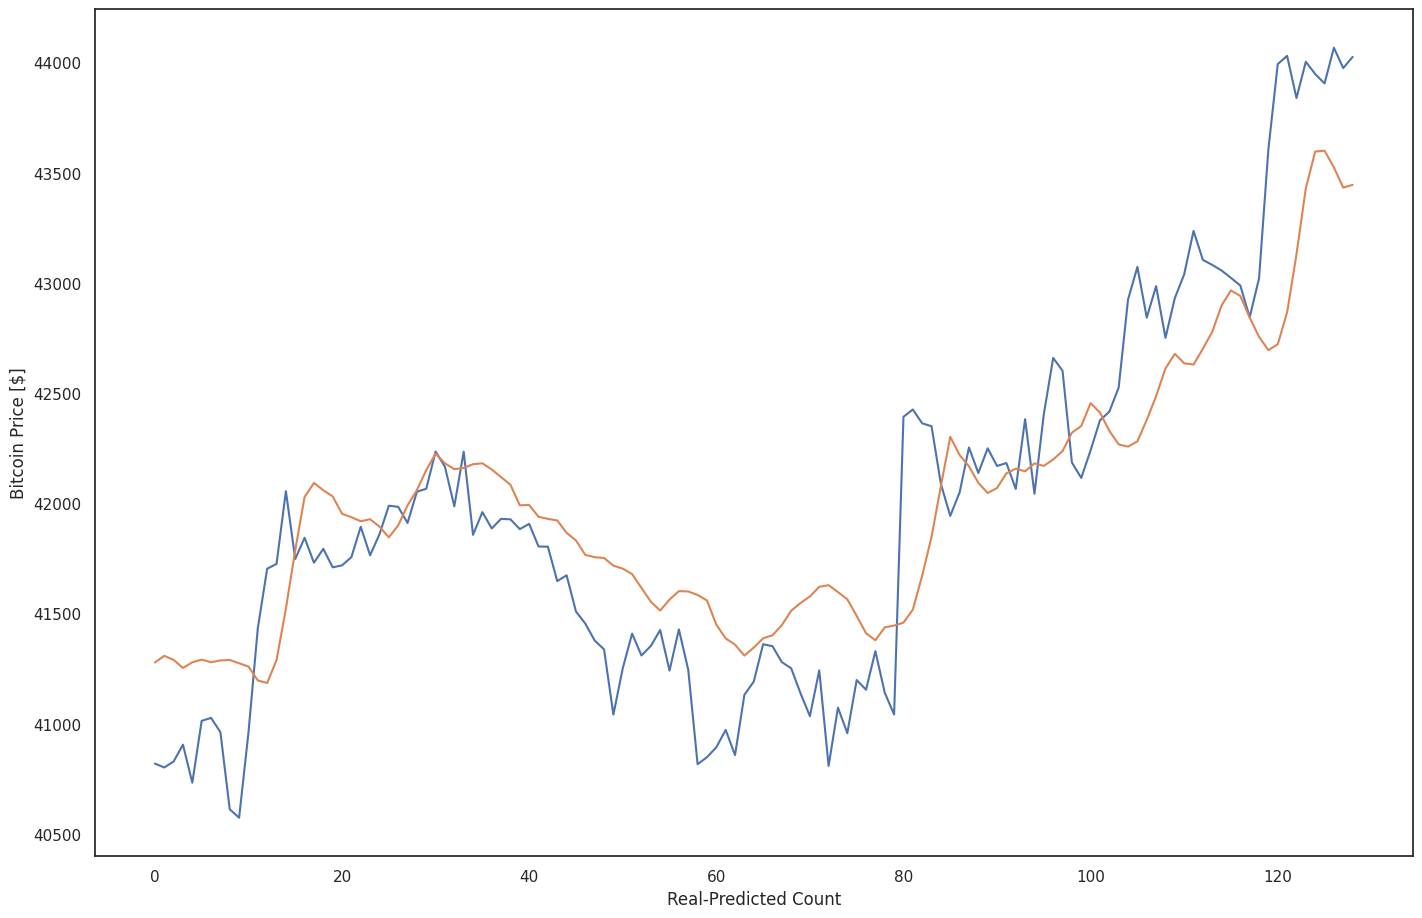

In [89]:
plt.figure(figsize=(17,11))
plt.plot(inv_y, label='Real')
plt.plot(test_predictions, label='Predicted')
plt.xlabel('Real-Predicted Count')
plt.ylabel('Bitcoin Price [$]')
plt.show()

In [90]:
prediction_df = test_data_S.copy()
prediction_df = prediction_df[look_back:]
prediction_df['predictions'] = test_predictions
train_df = train_data_S.copy()

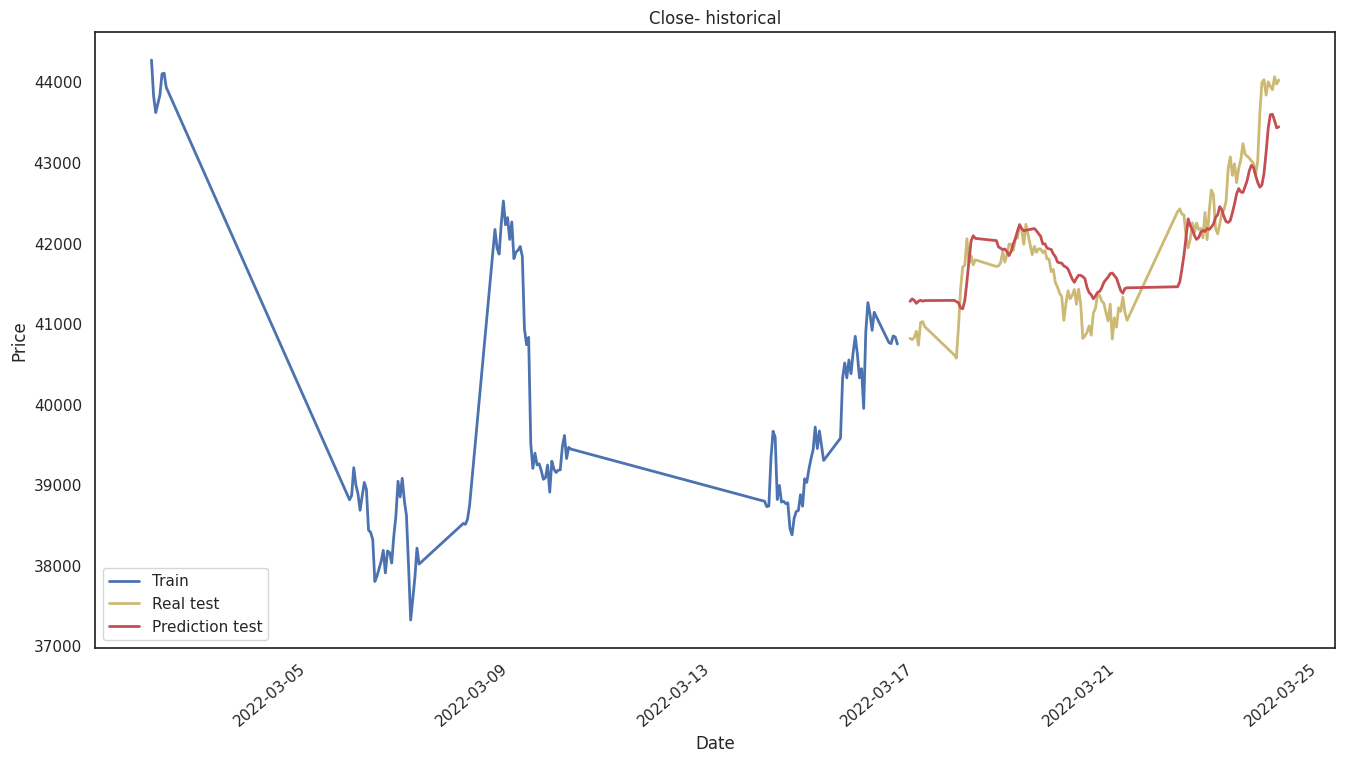

In [91]:
plt.figure(figsize=(16,8))
plt.plot(train_df['close'], 'b',label='Train', linewidth=2)
plt.plot(prediction_df['close'], 'y', label='Real test', linewidth=2)
plt.plot(prediction_df['predictions'], 'r', label='Prediction test', linewidth=2)
plt.xticks(rotation=40)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close'+'- historical')
plt.legend()
plt.show()

In [92]:
train_X, train_Y = create_dataset(train_data, look_back)
test_X, test_Y = create_dataset(test_data, look_back)

In [93]:
num_features = data.shape[1]
lstm_input_shape = (look_back, num_features)

train_X = np.reshape(train_X, (train_X.shape[0], look_back, num_features))
test_X = np.reshape(test_X, (test_X.shape[0], look_back, num_features))

print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(129, 5, 5) (129,) (129, 5, 5) (129,)


In [94]:
# Create the model
model_BiLSTM = Sequential()
model_BiLSTM.add(Bidirectional(LSTM(128, activation='linear', return_sequences=True), input_shape=(look_back, num_features)))
model_BiLSTM.add(Dropout(0.1))
model_BiLSTM.add(Bidirectional(LSTM(128, activation='linear')))
model_BiLSTM.add(Dropout(0.1))
model_BiLSTM.add(Dense(128, activation='linear'))
model_BiLSTM.add(Dense(1, activation='linear'))

# Compile the model
model_BiLSTM.compile(loss='mse', optimizer='adam')

# Define early stopping callback
early_stopping = EarlyStopping(patience=10, monitor='val_loss', restore_best_weights=True)

# Train the model
history = model_BiLSTM.fit(train_X, train_Y, validation_data=(test_X, test_Y), epochs=150, callbacks=[early_stopping], shuffle=False, verbose=2, validation_split = 0.1)


Epoch 1/150
5/5 - 7s - loss: 0.0626 - val_loss: 0.0177 - 7s/epoch - 1s/step
Epoch 2/150
5/5 - 0s - loss: 0.0244 - val_loss: 0.0212 - 249ms/epoch - 50ms/step
Epoch 3/150
5/5 - 0s - loss: 0.0151 - val_loss: 0.0143 - 247ms/epoch - 49ms/step
Epoch 4/150
5/5 - 0s - loss: 0.0186 - val_loss: 0.0143 - 262ms/epoch - 52ms/step
Epoch 5/150
5/5 - 0s - loss: 0.0168 - val_loss: 0.0138 - 244ms/epoch - 49ms/step
Epoch 6/150
5/5 - 0s - loss: 0.0148 - val_loss: 0.0106 - 251ms/epoch - 50ms/step
Epoch 7/150
5/5 - 0s - loss: 0.0153 - val_loss: 0.0123 - 241ms/epoch - 48ms/step
Epoch 8/150
5/5 - 0s - loss: 0.0144 - val_loss: 0.0093 - 264ms/epoch - 53ms/step
Epoch 9/150
5/5 - 0s - loss: 0.0141 - val_loss: 0.0088 - 238ms/epoch - 48ms/step
Epoch 10/150
5/5 - 0s - loss: 0.0133 - val_loss: 0.0090 - 264ms/epoch - 53ms/step
Epoch 11/150
5/5 - 0s - loss: 0.0133 - val_loss: 0.0086 - 253ms/epoch - 51ms/step
Epoch 12/150
5/5 - 0s - loss: 0.0125 - val_loss: 0.0092 - 269ms/epoch - 54ms/step
Epoch 13/150
5/5 - 0s - loss: 

In [95]:
model_BiLSTM.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 5, 256)            137216    
 al)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 5, 256)            0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               394240    
 onal)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 1)                

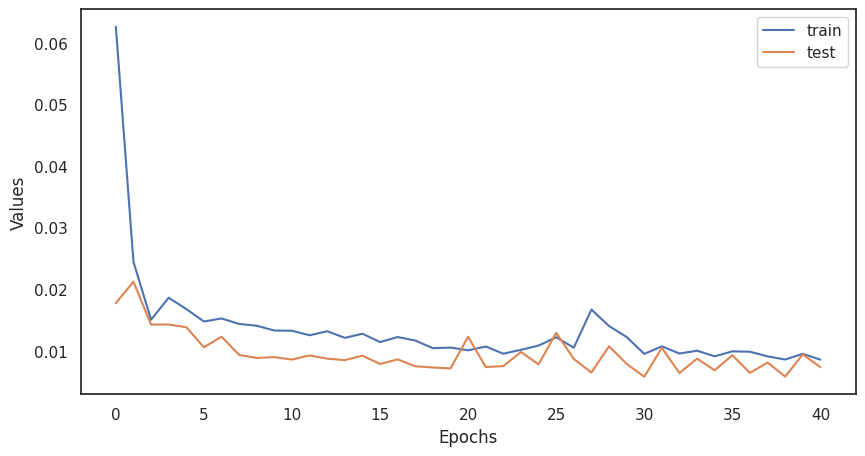

In [96]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.legend()
plt.show()

In [97]:
from sklearn.metrics import mean_squared_error
import math

test_predictions = model_BiLSTM.predict(test_X)
train_predictions = model_BiLSTM.predict(train_X)
test_mse = mean_squared_error(test_Y, test_predictions)
test_rmse = math.sqrt(test_mse)

print('Test MSE: {:.4f}'.format(test_mse))
print('Test RMSE: {:.4f}'.format(test_rmse))

5/5 [==============================] - 0s 11ms/step
Test MSE: 0.0058
Test RMSE: 0.0761


In [98]:
print("Test data R2 score:", r2_score(test_Y, test_predictions))
print("Train data R2 score:", r2_score(train_Y, train_predictions))

Test data R2 score: 0.9054751671909154
Train data R2 score: 0.7641732022141934


In [99]:
test_X = test_X.reshape((test_X.shape[0],look_back * num_features))
#Forecast
test_predictions = concatenate((test_predictions, test_X[:, -4:]), axis=1)
test_predictions = scaler.inverse_transform(test_predictions)
test_predictions = test_predictions[:,0]
#Actual
test_y = test_Y.reshape((len(test_Y), 1))
inv_y = concatenate((test_Y.reshape(-1,1), test_X[:, -4:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

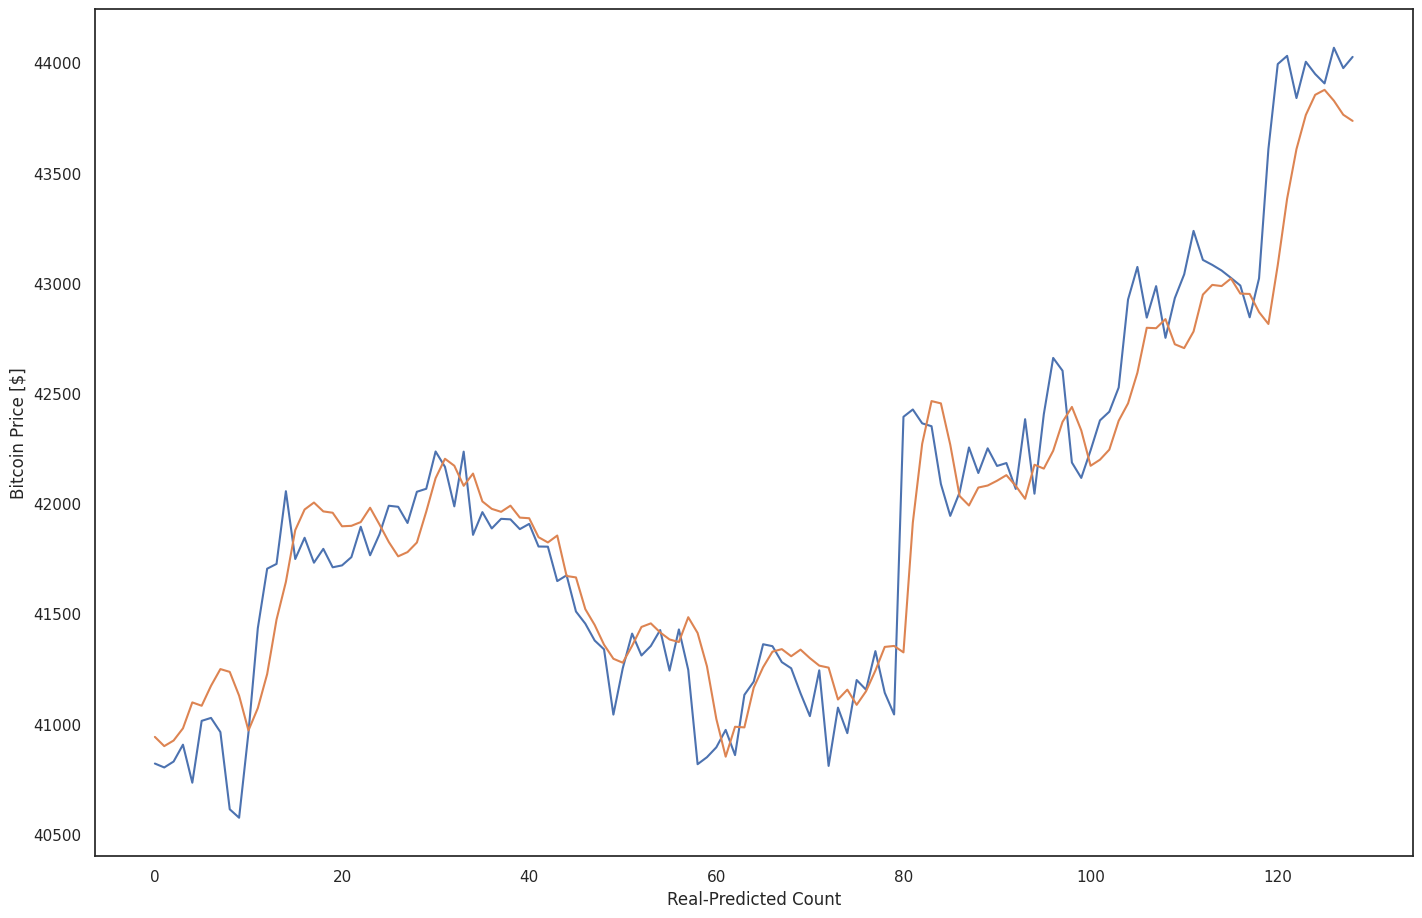

In [100]:
plt.figure(figsize=(17,11))
plt.plot(inv_y, label='Real')
plt.plot(test_predictions, label='Predicted')
plt.xlabel('Real-Predicted Count')
plt.ylabel('Bitcoin Price [$]')
plt.show()

In [101]:
prediction_df = test_data_S.copy()
prediction_df = prediction_df[look_back:]
prediction_df['predictions'] = test_predictions
train_df = train_data_S.copy()

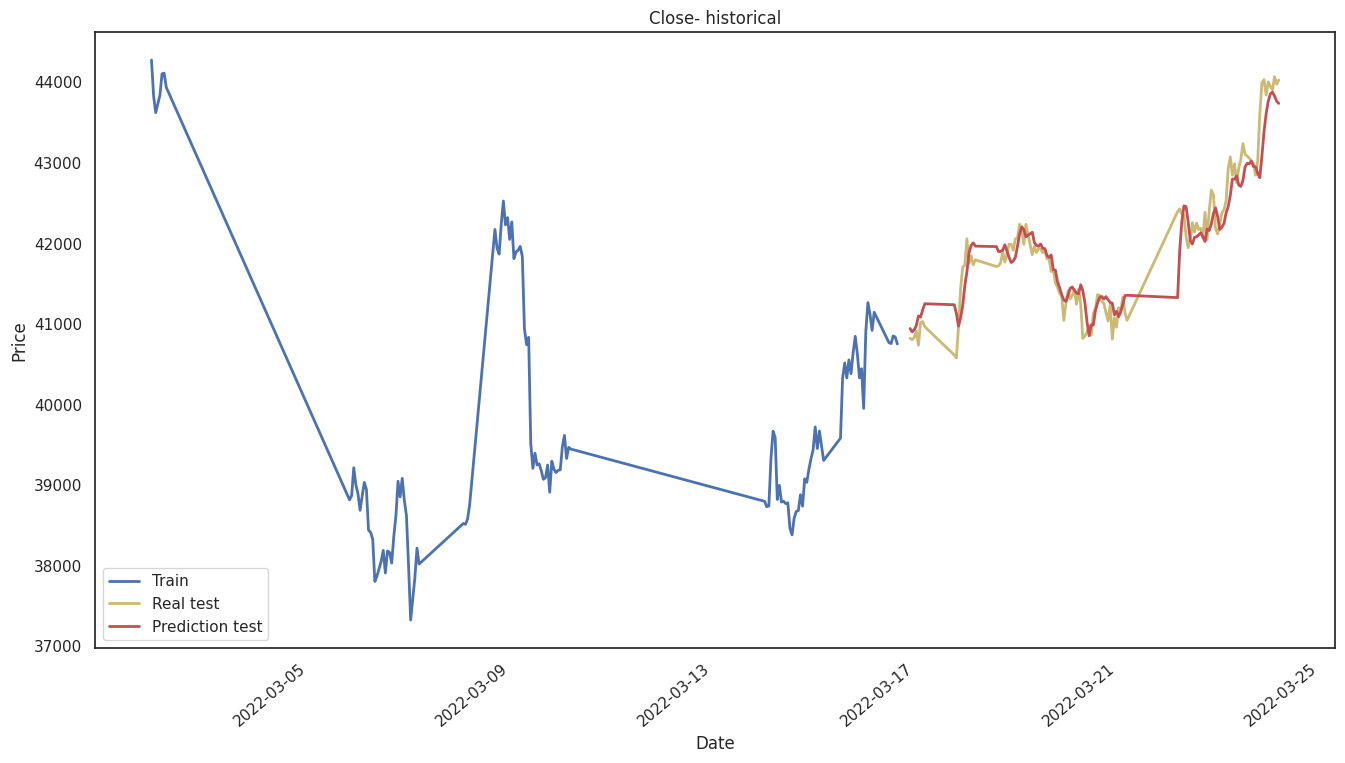

In [102]:
plt.figure(figsize=(16,8))
plt.plot(train_df['close'], 'b',label='Train', linewidth=2)
plt.plot(prediction_df['close'], 'y', label='Real test', linewidth=2)
plt.plot(prediction_df['predictions'], 'r', label='Prediction test', linewidth=2)
plt.xticks(rotation=40)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close'+'- historical')
plt.legend()
plt.show()

In [103]:
train_X, train_Y = create_dataset(train_data, look_back)
test_X, test_Y = create_dataset(test_data, look_back)

In [104]:
num_features = data.shape[1]
lstm_input_shape = (look_back, num_features)

train_X = np.reshape(train_X, (train_X.shape[0], look_back, num_features))
test_X = np.reshape(test_X, (test_X.shape[0], look_back, num_features))

print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(129, 5, 5) (129,) (129, 5, 5) (129,)


In [105]:
model_LSTM_A = Sequential()
model_LSTM_A.add(LSTM(units=256, activation='linear', input_shape=(look_back, num_features)))
model_LSTM_A.add(Dropout(0.1))
model_LSTM_A.add(Dense(128, activation='linear'))
model_LSTM_A.add(Dropout(0.3))
model_LSTM_A.add(Dense(64, activation='linear'))
model_LSTM_A.add(Dropout(0.2))
model_LSTM_A.add(Dense(1, activation='linear'))
model_LSTM_A.compile(loss='mae', optimizer='adam')
# Define early stopping callback
early_stopping = EarlyStopping(patience=20, monitor='val_loss', restore_best_weights=True)

# Train the model
history = model_LSTM_A.fit(train_X, train_Y, validation_data=(test_X, test_Y), epochs=150, callbacks=[early_stopping], shuffle=False, verbose=2, validation_split = 0.1)

Epoch 1/150
5/5 - 2s - loss: 0.1950 - val_loss: 0.1259 - 2s/epoch - 467ms/step
Epoch 2/150
5/5 - 0s - loss: 0.1156 - val_loss: 0.1165 - 148ms/epoch - 30ms/step
Epoch 3/150
5/5 - 0s - loss: 0.1176 - val_loss: 0.1022 - 330ms/epoch - 66ms/step
Epoch 4/150
5/5 - 0s - loss: 0.1245 - val_loss: 0.0855 - 419ms/epoch - 84ms/step
Epoch 5/150
5/5 - 0s - loss: 0.0897 - val_loss: 0.0874 - 243ms/epoch - 49ms/step
Epoch 6/150
5/5 - 0s - loss: 0.1060 - val_loss: 0.1128 - 203ms/epoch - 41ms/step
Epoch 7/150
5/5 - 0s - loss: 0.1079 - val_loss: 0.1232 - 144ms/epoch - 29ms/step
Epoch 8/150
5/5 - 0s - loss: 0.1057 - val_loss: 0.1136 - 179ms/epoch - 36ms/step
Epoch 9/150
5/5 - 0s - loss: 0.1215 - val_loss: 0.0955 - 171ms/epoch - 34ms/step
Epoch 10/150
5/5 - 0s - loss: 0.1064 - val_loss: 0.1057 - 170ms/epoch - 34ms/step
Epoch 11/150
5/5 - 0s - loss: 0.0955 - val_loss: 0.0798 - 180ms/epoch - 36ms/step
Epoch 12/150
5/5 - 0s - loss: 0.0818 - val_loss: 0.0632 - 138ms/epoch - 28ms/step
Epoch 13/150
5/5 - 0s - los

In [106]:
model_LSTM_A.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 256)               268288    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

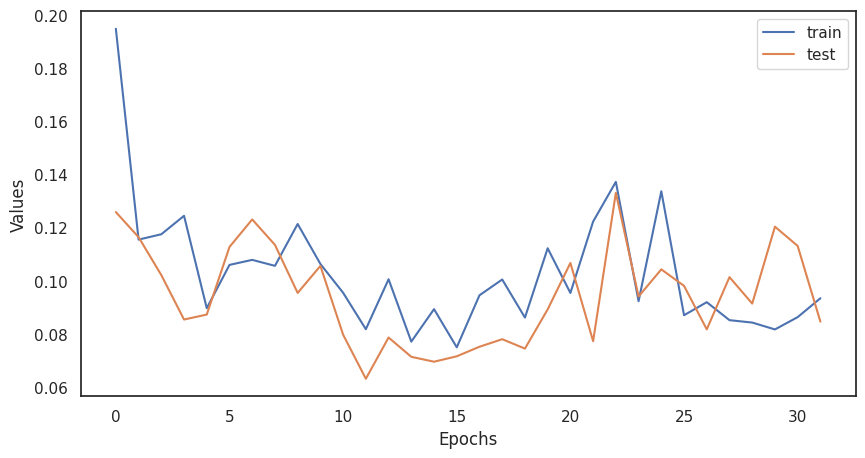

In [107]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.legend()
plt.show()

In [108]:
from sklearn.metrics import mean_squared_error
import math

test_predictions = model_LSTM_A.predict(test_X)
train_predictions = model_LSTM_A.predict(train_X)
test_mse = mean_squared_error(test_Y, test_predictions)
test_rmse = math.sqrt(test_mse)

print('Test MSE: {:.4f}'.format(test_mse))
print('Test RMSE: {:.4f}'.format(test_rmse))

5/5 [==============================] - 0s 6ms/step
Test MSE: 0.0074
Test RMSE: 0.0858


In [109]:
print("Test data R2 score:", r2_score(test_Y, test_predictions))
print("Train data R2 score:", r2_score(train_Y, train_predictions))

Test data R2 score: 0.8798903856048216
Train data R2 score: 0.6750397259317189


In [110]:
test_X = test_X.reshape((test_X.shape[0],look_back * num_features))
#Forecast
test_predictions = concatenate((test_predictions, test_X[:, -4:]), axis=1)
test_predictions = scaler.inverse_transform(test_predictions)
test_predictions = test_predictions[:,0]
#Actual
test_y = test_Y.reshape((len(test_Y), 1))
inv_y = concatenate((test_Y.reshape(-1,1), test_X[:, -4:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

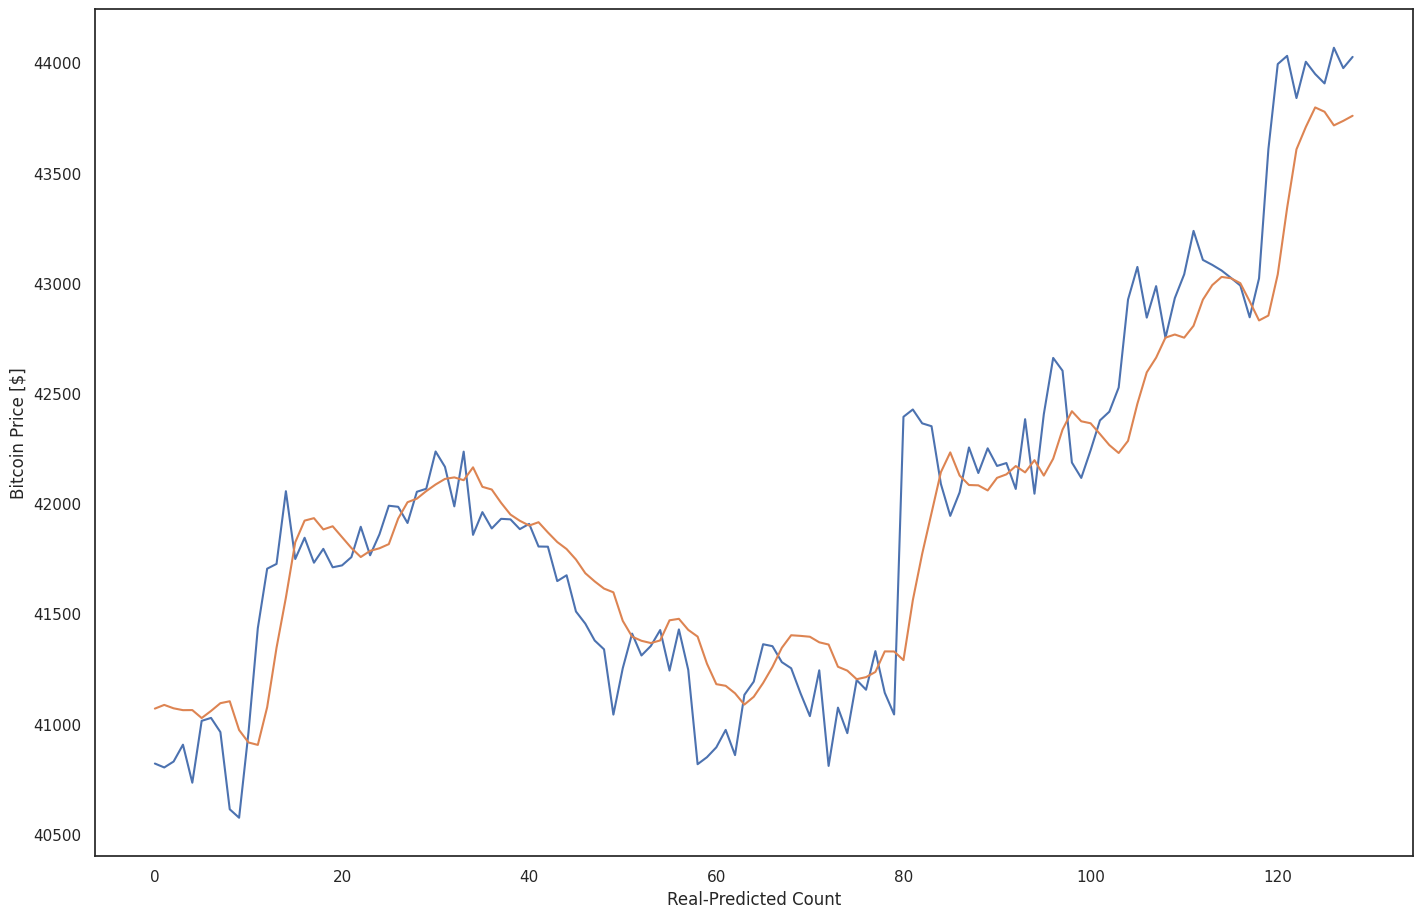

In [111]:
plt.figure(figsize=(17,11))
plt.plot(inv_y, label='Real')
plt.plot(test_predictions, label='Predicted')
plt.xlabel('Real-Predicted Count')
plt.ylabel('Bitcoin Price [$]')
plt.show()

In [112]:
prediction_df = test_data_S.copy()
prediction_df = prediction_df[look_back:]
prediction_df['predictions'] = test_predictions
train_df = train_data_S.copy()

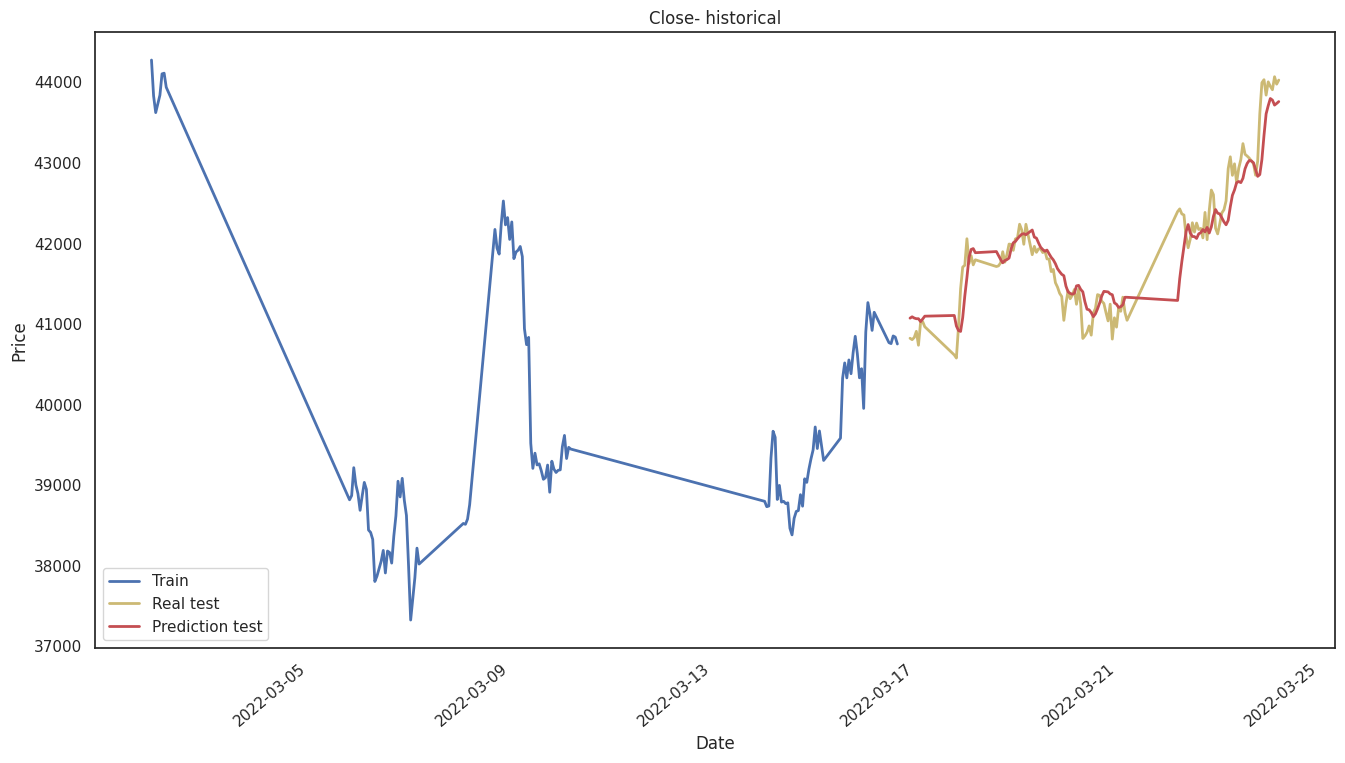

In [113]:
plt.figure(figsize=(16,8))
plt.plot(train_df['close'], 'b',label='Train', linewidth=2)
plt.plot(prediction_df['close'], 'y', label='Real test', linewidth=2)
plt.plot(prediction_df['predictions'], 'r', label='Prediction test', linewidth=2)
plt.xticks(rotation=40)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close'+'- historical')
plt.legend()
plt.show()

In [120]:
train_X, train_Y = create_dataset(train_data, look_back)
test_X, test_Y = create_dataset(test_data, look_back)

In [121]:
num_features = data.shape[1]
lstm_input_shape = (look_back, num_features)

train_X = np.reshape(train_X, (train_X.shape[0], look_back, num_features))
test_X = np.reshape(test_X, (test_X.shape[0], look_back, num_features))

print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(129, 5, 5) (129,) (129, 5, 5) (129,)


In [122]:
model = Sequential()
model.add(LSTM(256,activation='linear', input_shape=(look_back, num_features)))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
early_stopping = EarlyStopping(patience=20, monitor='val_loss', restore_best_weights=True)

# Train the model
history = model.fit(train_X, train_Y, validation_data=(test_X, test_Y), epochs=150, batch_size = 14, callbacks=[early_stopping], shuffle=False, verbose=2, validation_split = 0.1)

Epoch 1/150
10/10 - 3s - loss: 0.0649 - val_loss: 0.0255 - 3s/epoch - 285ms/step
Epoch 2/150
10/10 - 0s - loss: 0.0226 - val_loss: 0.0258 - 183ms/epoch - 18ms/step
Epoch 3/150
10/10 - 0s - loss: 0.0191 - val_loss: 0.0173 - 194ms/epoch - 19ms/step
Epoch 4/150
10/10 - 0s - loss: 0.0180 - val_loss: 0.0155 - 190ms/epoch - 19ms/step
Epoch 5/150
10/10 - 0s - loss: 0.0175 - val_loss: 0.0140 - 189ms/epoch - 19ms/step
Epoch 6/150
10/10 - 0s - loss: 0.0169 - val_loss: 0.0133 - 223ms/epoch - 22ms/step
Epoch 7/150
10/10 - 0s - loss: 0.0167 - val_loss: 0.0131 - 219ms/epoch - 22ms/step
Epoch 8/150
10/10 - 0s - loss: 0.0162 - val_loss: 0.0127 - 198ms/epoch - 20ms/step
Epoch 9/150
10/10 - 0s - loss: 0.0161 - val_loss: 0.0125 - 212ms/epoch - 21ms/step
Epoch 10/150
10/10 - 0s - loss: 0.0157 - val_loss: 0.0122 - 198ms/epoch - 20ms/step
Epoch 11/150
10/10 - 0s - loss: 0.0156 - val_loss: 0.0121 - 214ms/epoch - 21ms/step
Epoch 12/150
10/10 - 0s - loss: 0.0152 - val_loss: 0.0120 - 191ms/epoch - 19ms/step
Epo

In [123]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 256)               268288    
                                                                 
 dense_6 (Dense)             (None, 1)                 257       
                                                                 
Total params: 268545 (1.02 MB)
Trainable params: 268545 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


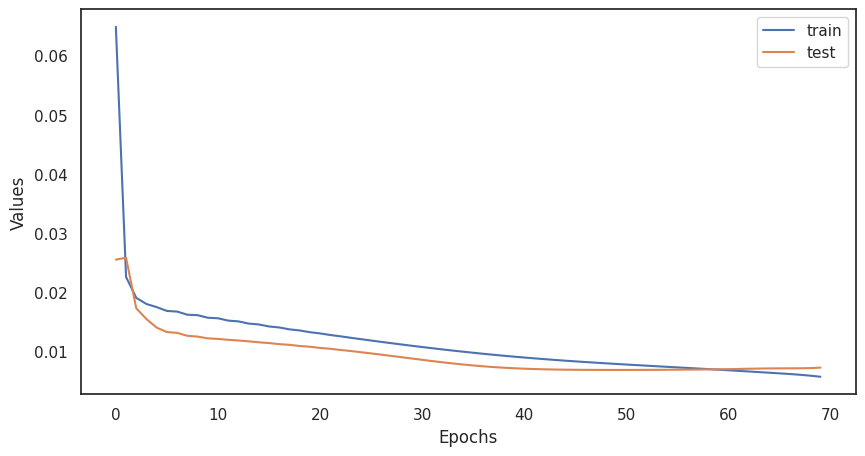

In [124]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.legend()
plt.show()

In [125]:
from sklearn.metrics import mean_squared_error
import math

test_predictions = model.predict(test_X)
train_predictions = model.predict(train_X)
test_mse = mean_squared_error(test_Y, test_predictions)
test_rmse = math.sqrt(test_mse)

print('Test MSE: {:.4f}'.format(test_mse))
print('Test RMSE: {:.4f}'.format(test_rmse))

5/5 [==============================] - 0s 8ms/step
Test MSE: 0.0069
Test RMSE: 0.0829


In [126]:
print("Test data R2 score:", r2_score(test_Y, test_predictions))
print("Train data R2 score:", r2_score(train_Y, train_predictions))

Test data R2 score: 0.8876612950283712
Train data R2 score: 0.8172858062296195


In [127]:
test_X = test_X.reshape((test_X.shape[0],look_back * num_features))
#Forecast
test_predictions = concatenate((test_predictions, test_X[:, -4:]), axis=1)
test_predictions = scaler.inverse_transform(test_predictions)
test_predictions = test_predictions[:,0]
#Actual
test_y = test_Y.reshape((len(test_Y), 1))
inv_y = concatenate((test_Y.reshape(-1,1), test_X[:, -4:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

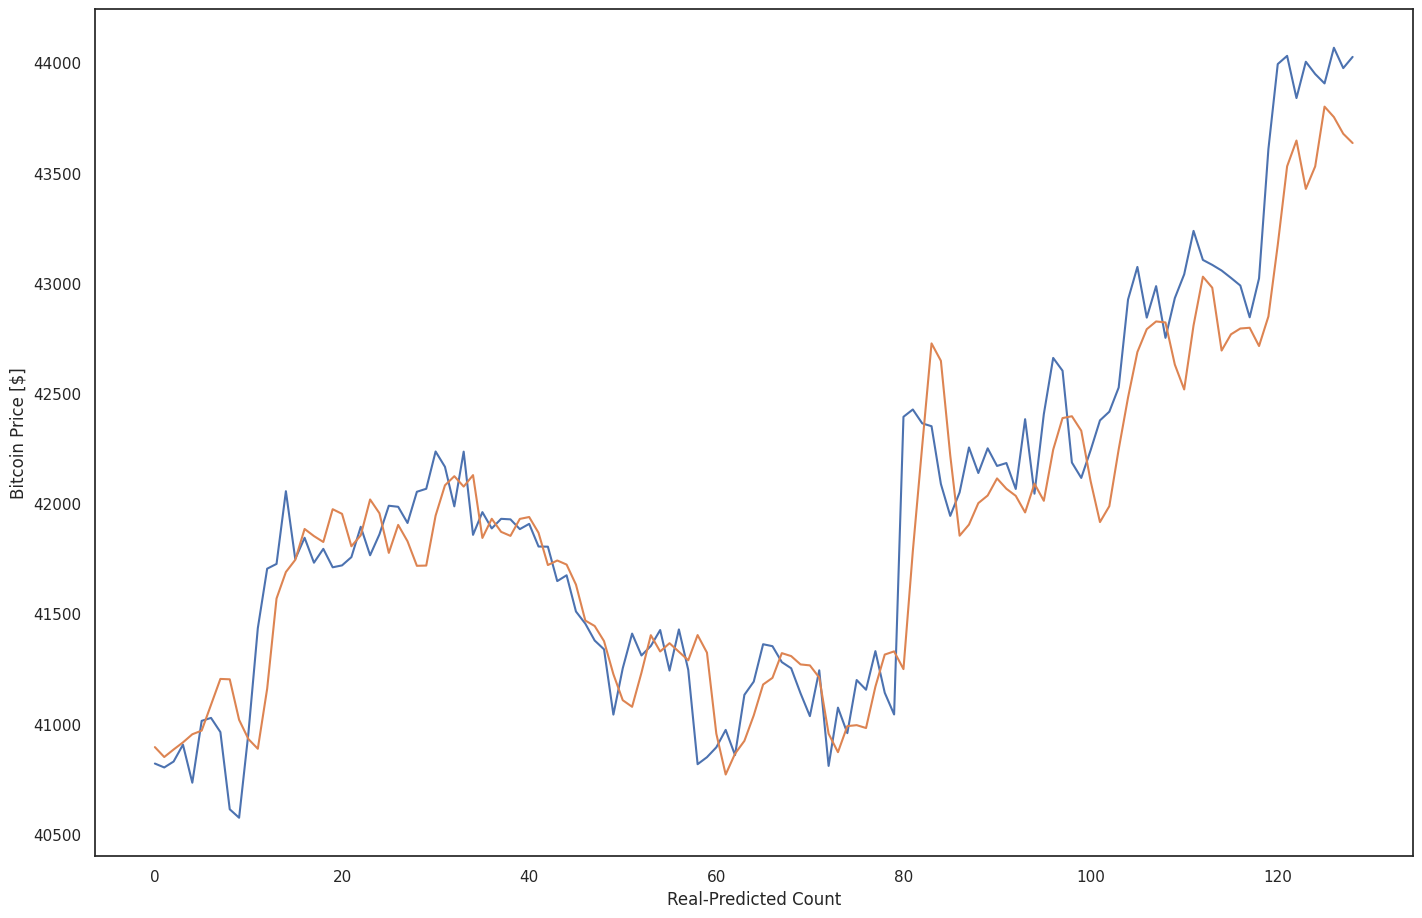

In [130]:
plt.figure(figsize=(17,11))
plt.plot(inv_y, label='Real')
plt.plot(test_predictions, label='Predicted')
plt.xlabel('Real-Predicted Count')
plt.ylabel('Bitcoin Price [$]')
plt.show()

In [131]:
prediction_df = test_data_S.copy()
prediction_df = prediction_df[look_back:]
prediction_df['predictions'] = test_predictions
train_df = train_data_S.copy()

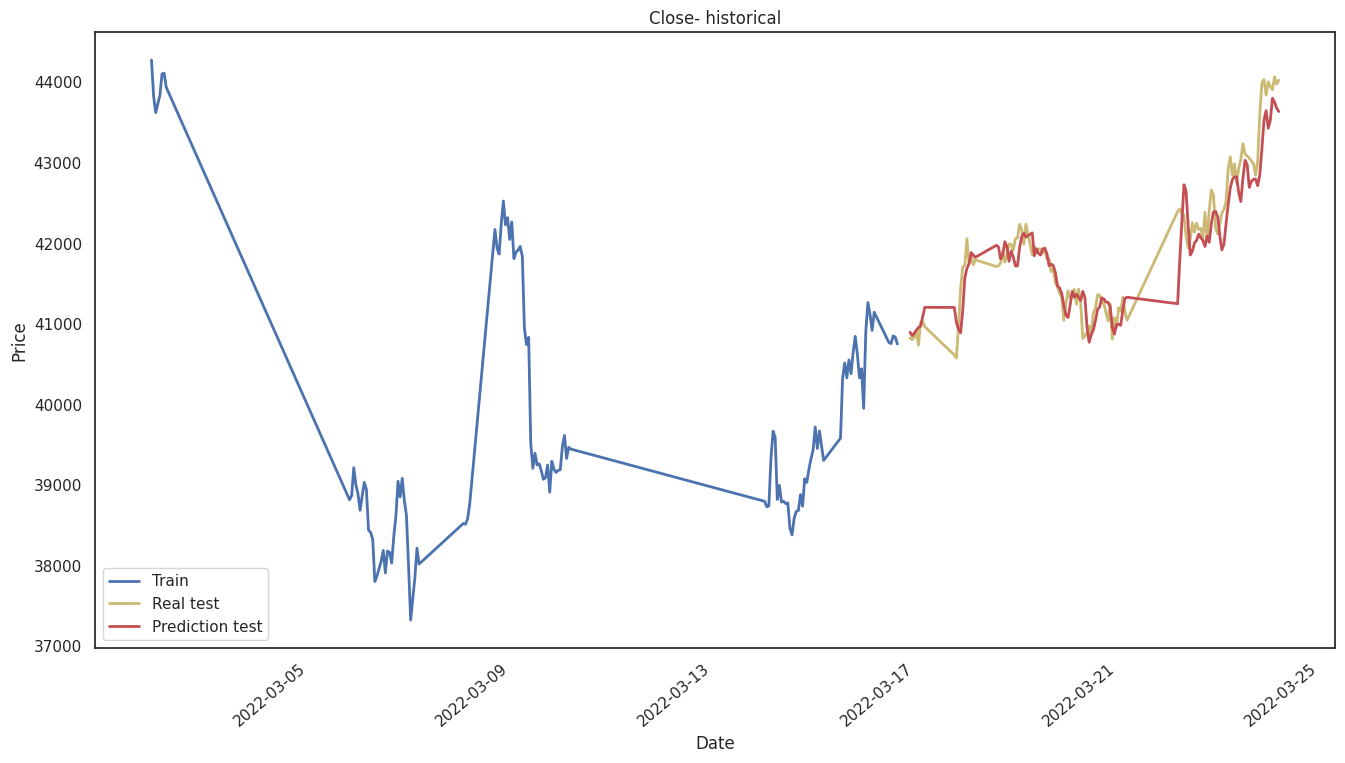

In [132]:
plt.figure(figsize=(16,8))
plt.plot(train_df['close'], 'b',label='Train', linewidth=2)
plt.plot(prediction_df['close'], 'y', label='Real test', linewidth=2)
plt.plot(prediction_df['predictions'], 'r', label='Prediction test', linewidth=2)
plt.xticks(rotation=40)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close'+'- historical')
plt.legend()
plt.show()


In [133]:
x_input=test_X[-5:]
def data_prep(data):
    data = np.array(data)
    data = np.reshape(data, (data.shape[0], look_back, 5))
    print(data.shape[0])
    return data


dataset = data_prep(x_input)
dataset[0]

5


array([[0.86835694, 0.39920085, 0.71211883, 0.72198732, 0.57104079],
       [0.97880576, 0.35129635, 0.64487919, 1.        , 0.94587341],
       [0.98947302, 0.53638614, 0.49840616, 0.98484848, 1.        ],
       [0.93466803, 0.42475176, 0.28887653, 0.91649049, 0.58131439],
       [0.98180611, 0.38311097, 0.13587367, 0.70436927, 0.72742705]])

In [137]:
predictions = []

for i in range(72):
    prediction = model_LSTM_A.predict(dataset)
    predictions.append(prediction[0])
    dataset = np.append(dataset, prediction)
    dataset = np.array(dataset[5:])
    dataset = np.reshape(dataset, (-1, look_back, 5))
    dataset = data_prep(dataset)


1/1 [==============================] - 0s 40ms/step
5
1/1 [==============================] - 0s 43ms/step
5
1/1 [==============================] - 0s 44ms/step
5
1/1 [==============================] - 0s 57ms/step
5
1/1 [==============================] - 0s 58ms/step
5
1/1 [==============================] - 0s 103ms/step
5
1/1 [==============================] - 0s 88ms/step
5
1/1 [==============================] - 0s 82ms/step
5
1/1 [==============================] - 0s 91ms/step
5
1/1 [==============================] - 0s 90ms/step
5
1/1 [==============================] - 0s 100ms/step
5
1/1 [==============================] - 0s 87ms/step
5
1/1 [==============================] - 0s 79ms/step
5
1/1 [==============================] - 0s 89ms/step
5
1/1 [==============================] - 0s 90ms/step
5
1/1 [==============================] - 0s 107ms/step
5
1/1 [==============================] - 0s 51ms/step
5
1/1 [==============================] - 0s 41ms/step
5
1/1 [====================

In [138]:
predictions = np.array(predictions)
predictions = np.reshape(predictions, (-1, 1))

In [139]:
reshaped_predictions = np.zeros((72, 5))
predictions = concatenate((predictions, reshaped_predictions[:, -4:]), axis=1)
predictions = scaler.inverse_transform(predictions)
predictions = predictions[:,0]

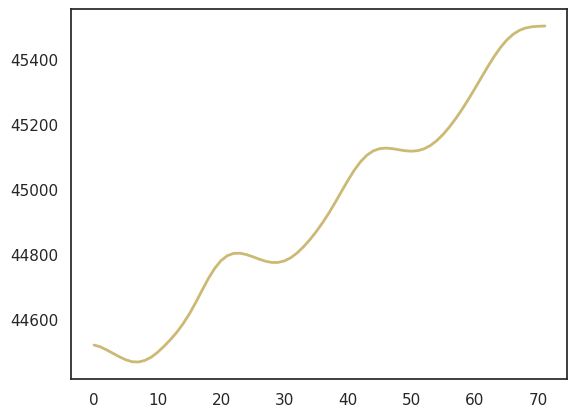

In [140]:
plt.plot(predictions, 'y', label='Real test', linewidth=2)

In [141]:
# Boyutları uyumlu hale getirme
if len(test_predictions) < len(predictions):
    liste1 = np.resize(test_predictions, predictions.shape)
else:
    liste2 = np.resize(predictions, test_predictions.shape)

# Birleştirme işlemi
merge_list = np.concatenate((test_predictions, predictions))


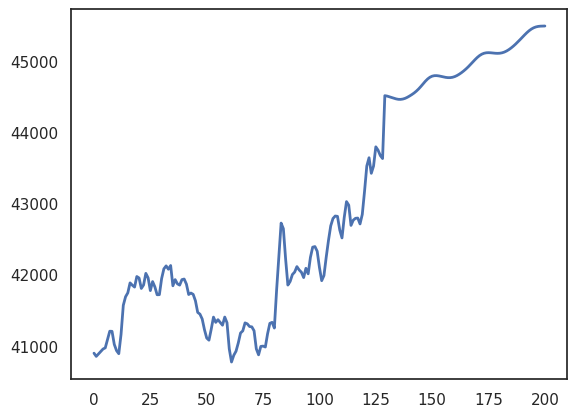

In [142]:
plt.plot(merge_list, 'b', label='Real test', linewidth=2)

In [143]:
predictions

array([44520.2014042 , 44514.62469689, 44505.15099836, 44494.53014618,
       44484.0833449 , 44474.94025979, 44468.82765894, 44468.00903678,
       44472.76170886, 44482.69093773, 44497.60851526, 44515.8580432 ,
       44536.05627495, 44558.50967333, 44584.75388358, 44615.23527545,
       44650.19660415, 44687.67084471, 44724.2015462 , 44755.72349594,
       44779.71087399, 44794.95490105, 44802.0543455 , 44802.43908958,
       44798.31266762, 44791.69123855, 44784.3452914 , 44777.89333294,
       44774.0771213 , 44774.14665838, 44778.89974685, 44788.78358925,
       44803.54502064, 44822.30962264, 44844.25918948, 44869.01897043,
       44896.39742623, 44926.48782818, 44959.09655505, 44993.25383522,
       45027.03803023, 45058.1744031 , 45084.43943284, 45104.33619844,
       45117.3437964 , 45124.03018226, 45125.67283964, 45123.95023544,
       45120.63702256, 45117.51451618, 45116.15625296, 45117.86261797,
       45123.62503508, 45134.00771234, 45149.04979039, 45168.37860044,
      

In [144]:
import pandas as pd
import datetime

# Specify the start date and time
start_date = datetime.datetime(2022, 3, 25, 0, 0, 0)

# Create a list of timestamps for the next 72 hours
timestamps = [start_date + datetime.timedelta(hours=i) for i in range(72)]

# Convert the timestamps into a DataFrame
df_future = pd.DataFrame(timestamps, columns=['Timestamp'])

df_future['predictions'] = predictions
df_future.head()

Timestamp   predictions
0 2022-03-25 00:00:00  44520.201404
1 2022-03-25 01:00:00  44514.624697
2 2022-03-25 02:00:00  44505.150998
3 2022-03-25 03:00:00  44494.530146
4 2022-03-25 04:00:00  44484.083345

In [145]:
df_future.tail()

Timestamp   predictions
67 2022-03-27 19:00:00  45487.861096
68 2022-03-27 20:00:00  45495.164987
69 2022-03-27 21:00:00  45498.777168
70 2022-03-27 22:00:00  45500.199972
71 2022-03-27 23:00:00  45501.041912

In [146]:
df_future['Timestamp'] = pd.to_datetime(df_future['Timestamp'])
df_future = df_future.set_index(pd.DatetimeIndex(df_future['Timestamp']))
df_future.head()

Timestamp   predictions
Timestamp                                            
2022-03-25 00:00:00 2022-03-25 00:00:00  44520.201404
2022-03-25 01:00:00 2022-03-25 01:00:00  44514.624697
2022-03-25 02:00:00 2022-03-25 02:00:00  44505.150998
2022-03-25 03:00:00 2022-03-25 03:00:00  44494.530146
2022-03-25 04:00:00 2022-03-25 04:00:00  44484.083345

In [147]:
df_future_merged = pd.merge(df_future,df_bitcoin, how='inner',left_index=True, right_index=True)

In [148]:
df_future_merged.head()

Timestamp   predictions        unix   symbol  \
2022-03-25 00:00:00 2022-03-25 00:00:00  44520.201404  1648166400  BTC/USD   
2022-03-25 01:00:00 2022-03-25 01:00:00  44514.624697  1648170000  BTC/USD   
2022-03-25 02:00:00 2022-03-25 02:00:00  44505.150998  1648173600  BTC/USD   
2022-03-25 03:00:00 2022-03-25 03:00:00  44494.530146  1648177200  BTC/USD   
2022-03-25 04:00:00 2022-03-25 04:00:00  44484.083345  1648180800  BTC/USD   

                         open      high       low     close  Volume BTC  \
2022-03-25 00:00:00  44025.99  44033.22  43858.98  43985.27   27.394498   
2022-03-25 01:00:00  43999.21  44400.00  43953.27  44163.27   99.624440   
2022-03-25 02:00:00  44143.38  44174.39  43904.36  43973.86   35.065102   
2022-03-25 03:00:00  43962.35  44023.36  43898.92  43999.60   21.736145   
2022-03-25 04:00:00  43990.40  44126.43  43950.17  44118.82   13.836004   

                       Volume USD  
2022-03-25 00:00:00  1.204954e+06  
2022-03-25 01:00:00  4.399741e+06  
2022-03-25 02:00:00  1.541948e+06  
2022-03-25 03:00:00  9.563817e+05  
2022-03-25 04:00:00  6.104282e+05

In [149]:
df_future_merged = df_future_merged.drop(['Timestamp','unix','symbol', 'open', 'high', 'low', 'Volume BTC', 'Volume USD'], axis = 1)
df_future_merged.head()

predictions     close
2022-03-25 00:00:00  44520.201404  43985.27
2022-03-25 01:00:00  44514.624697  44163.27
2022-03-25 02:00:00  44505.150998  43973.86
2022-03-25 03:00:00  44494.530146  43999.60
2022-03-25 04:00:00  44484.083345  44118.82

In [150]:
df_future_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2022-03-25 00:00:00 to 2022-03-27 23:00:00
Freq: H
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   predictions  72 non-null     float64
 1   close        72 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


In [151]:
timestamps = pd.date_range(start='2022-03-25 00:00:00', end='2022-03-27 23:00:00', freq='H')
df_future_merged['Timestamp'] = timestamps
df_future_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2022-03-25 00:00:00 to 2022-03-27 23:00:00
Freq: H
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   predictions  72 non-null     float64       
 1   close        72 non-null     float64       
 2   Timestamp    72 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.2 KB


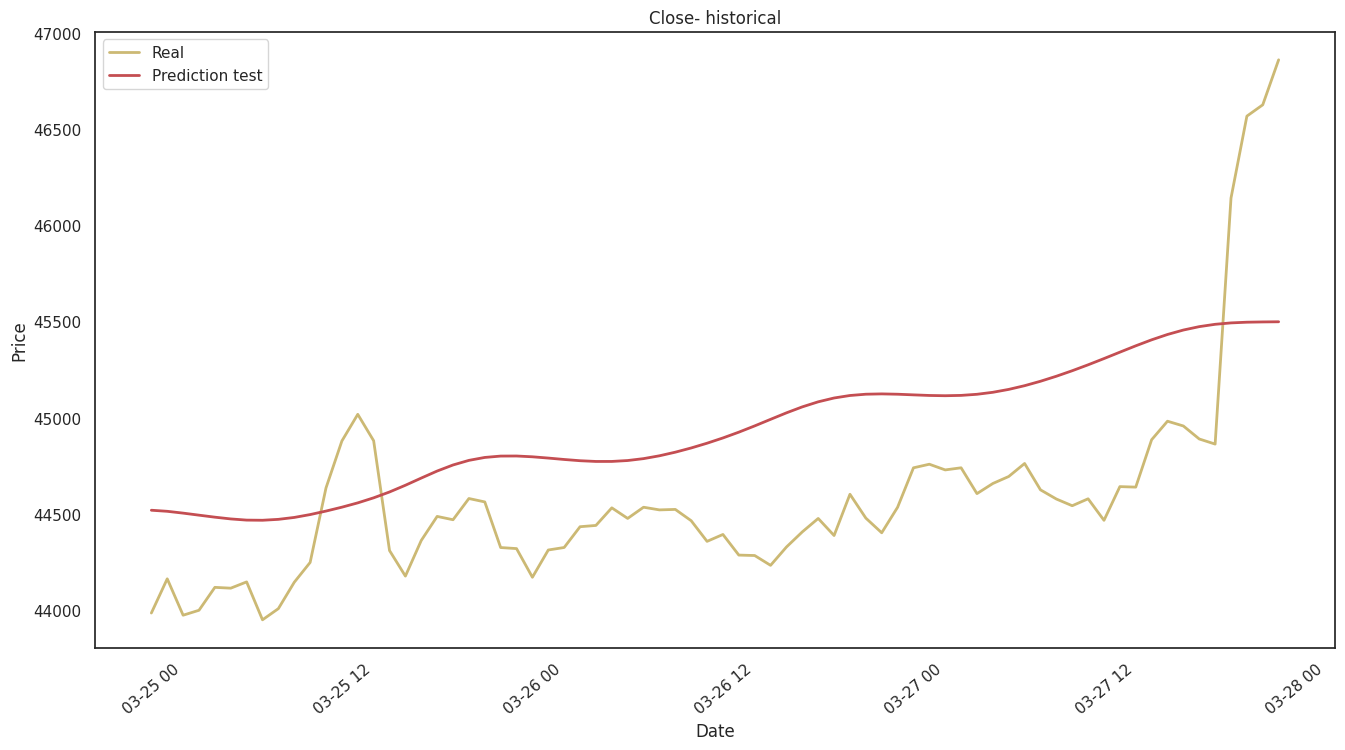

In [153]:
plt.figure(figsize=(16,8))
plt.plot(df_future_merged['close'], 'y', label='Real', linewidth=2)
plt.plot(df_future_merged['predictions'], 'r', label='Prediction test', linewidth=2)
plt.xticks(rotation=40)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close'+'- historical')
plt.legend()
plt.show()

In [226]:
import pandas as pd
import datetime

# Specify the start date and time
start_date = pd.to_datetime('2023-06-15 00:00:00')

# Create a list of timestamps for the next 72 hours
timestamps = pd.date_range(start=start_date, periods=72, freq='H')

# Convert the timestamps into a DataFrame
df_today = pd.DataFrame({'Timestamp': timestamps})
df_today['Timestamp'] = pd.to_datetime(df_today['Timestamp'])
df_today = df_today.set_index(pd.DatetimeIndex(df_today['Timestamp']))
df_today.head()

Timestamp
Timestamp                              
2023-06-15 00:00:00 2023-06-15 00:00:00
2023-06-15 01:00:00 2023-06-15 01:00:00
2023-06-15 02:00:00 2023-06-15 02:00:00
2023-06-15 03:00:00 2023-06-15 03:00:00
2023-06-15 04:00:00 2023-06-15 04:00:00

In [227]:
df_today.tail()

Timestamp
Timestamp                              
2023-06-17 19:00:00 2023-06-17 19:00:00
2023-06-17 20:00:00 2023-06-17 20:00:00
2023-06-17 21:00:00 2023-06-17 21:00:00
2023-06-17 22:00:00 2023-06-17 22:00:00
2023-06-17 23:00:00 2023-06-17 23:00:00

In [228]:
df_today_merged = pd.merge(df_today,df_bitcoin, how='inner',left_index=True, right_index=True)
df_today_merged = df_today_merged.drop(['unix','symbol', 'open', 'high', 'low', 'Volume USD'], axis = 1)
df_today_merged = final_df.append(df_today_merged)  # Eksik tarihleri içeren DataFrame'i ana DataFrame'e ekleyin
df_today_merged.tail()

<ipython-input-228-d764a8d15f35>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_today_merged = final_df.append(df_today_merged)  # Eksik tarihleri içeren DataFrame'i ana DataFrame'e ekleyin


close  compound  Volume BTC  tweet_vol  score  \
2023-06-17 19:00:00  26465.0       NaN    6.453371        NaN    NaN   
2023-06-17 20:00:00  26533.0       NaN   11.599019        NaN    NaN   
2023-06-17 21:00:00  26507.0       NaN    4.143825        NaN    NaN   
2023-06-17 22:00:00  26553.0       NaN   53.932362        NaN    NaN   
2023-06-17 23:00:00  26507.0       NaN   28.533621        NaN    NaN   

                              Timestamp  
2023-06-17 19:00:00 2023-06-17 19:00:00  
2023-06-17 20:00:00 2023-06-17 20:00:00  
2023-06-17 21:00:00 2023-06-17 21:00:00  
2023-06-17 22:00:00 2023-06-17 22:00:00  
2023-06-17 23:00:00 2023-06-17 23:00:00

In [229]:
for tolerans in range(1,300):
  for i, row in df_today_merged.iterrows():
    if pd.isna(row['compound']):
        close_value = row['close']*1.5
        matching_rows = df_today_merged[np.isclose(df_today_merged['close'], close_value, atol=tolerans)]
        matching_compounds = matching_rows['compound'].dropna()
        if not matching_compounds.empty:
            compound_value = matching_compounds.values[0]
            df_today_merged.at[i, 'compound'] = compound_value

In [230]:
for tolerans in range(1,300):
  for i, row in df_today_merged.iterrows():
    if pd.isna(row['tweet_vol']):
        close_value = row['close']*1.5
        matching_rows = df_today_merged[np.isclose(df_today_merged['close'], close_value, atol=tolerans)]
        matching_compounds = matching_rows['tweet_vol'].dropna()
        if not matching_compounds.empty:
            compound_value = matching_compounds.values[0]
            df_today_merged.at[i, 'tweet_vol'] = compound_value

In [231]:
for tolerans in range(1,300):
  for i, row in df_today_merged.iterrows():
    if pd.isna(row['score']):
        close_value = row['close']*1.5
        matching_rows = df_today_merged[np.isclose(df_today_merged['close'], close_value, atol=tolerans)]
        matching_compounds = matching_rows['score'].dropna()
        if not matching_compounds.empty:
            compound_value = matching_compounds.values[0]
            df_today_merged.at[i, 'score'] = compound_value

In [232]:
df_today_merged['Timestamp'] = pd.to_datetime(df_today_merged['Timestamp'])

# Specify the start and end dates for the range
start_date = pd.to_datetime('2023-06-15 00:00:00')
end_date = pd.to_datetime('2023-06-17 23:00:00')

# Filter the DataFrame for the specified date range
df_today_merged = df_today_merged[(df_today_merged['Timestamp'] >= start_date) & (df_today_merged['Timestamp'] <= end_date)]

In [233]:
df_today_merged = df_today_merged.drop(['Timestamp'], axis = 1)


In [234]:
df_today_merged.head()

close  compound  Volume BTC  tweet_vol        score
2023-06-15 00:00:00  25199.0  0.127686   41.876525      556.0  4286.378910
2023-06-15 01:00:00  25061.0  0.117180   18.773126      739.0  5827.398972
2023-06-15 02:00:00  25080.0  0.117180   10.353637      739.0  5827.398972
2023-06-15 03:00:00  25053.0  0.117180   13.458608      739.0  5827.398972
2023-06-15 04:00:00  25011.0  0.117180   92.824351      739.0  5827.398972

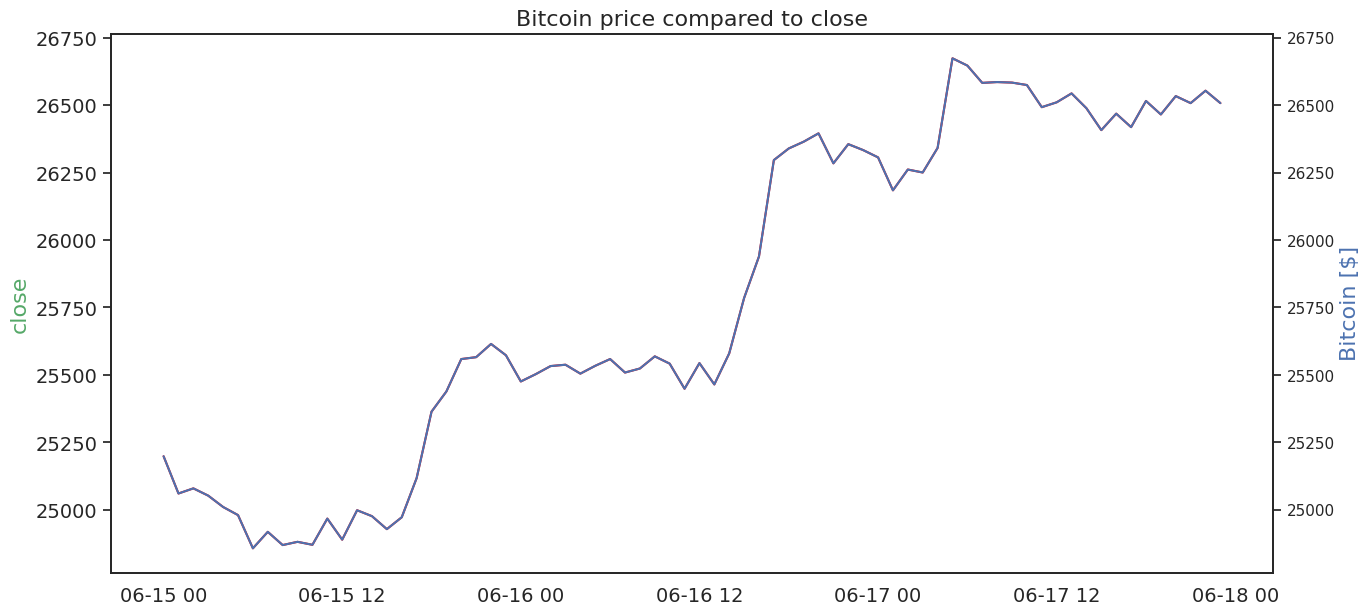

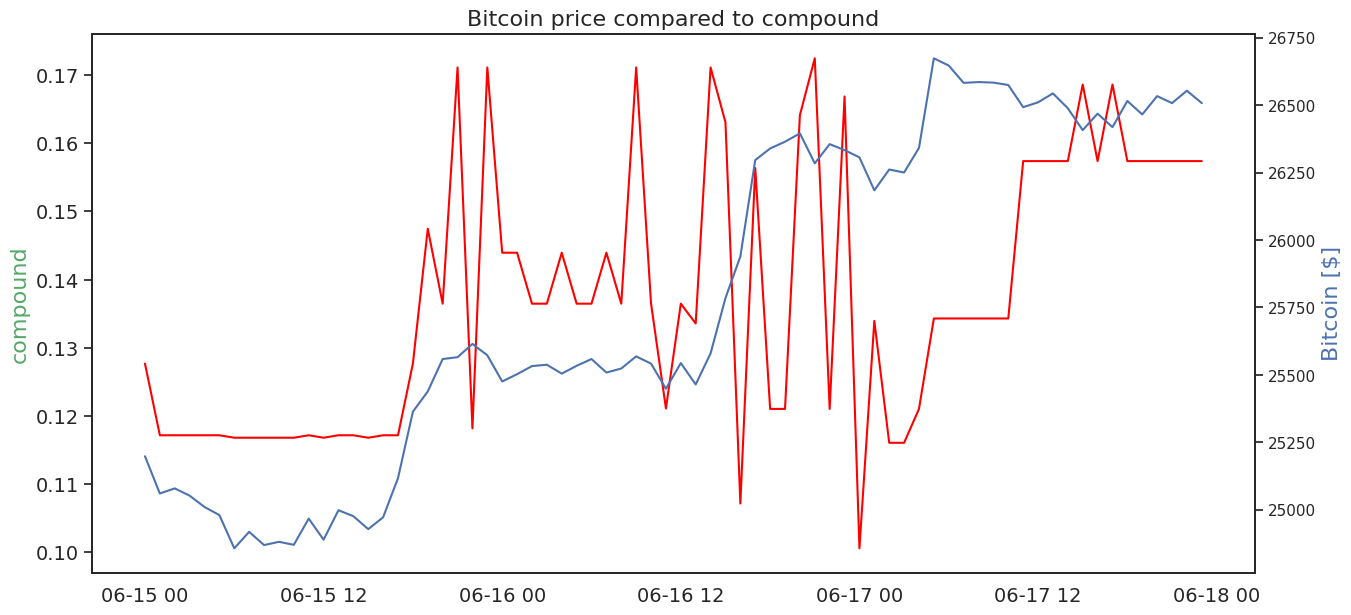

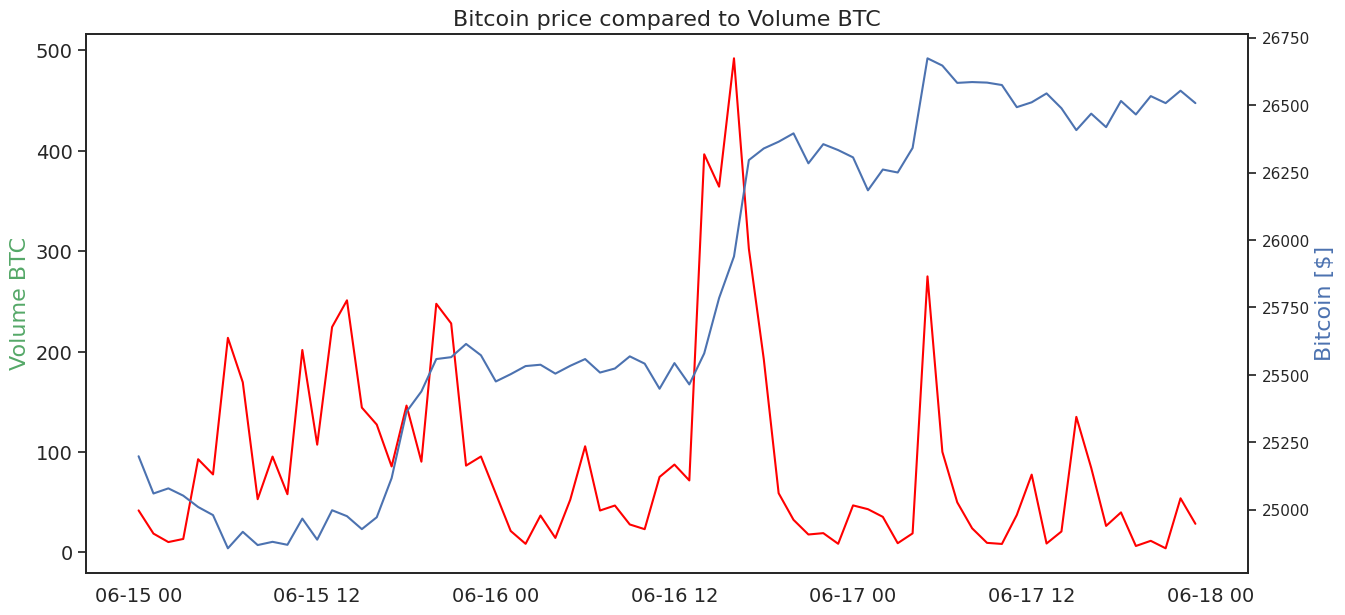

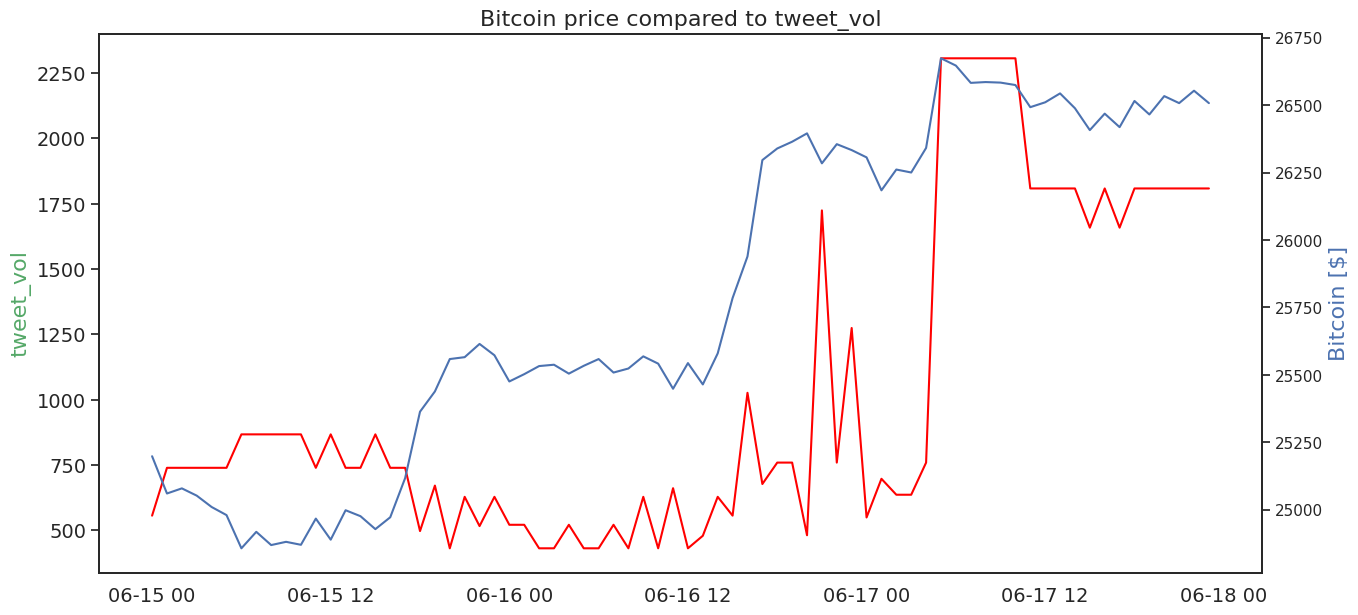

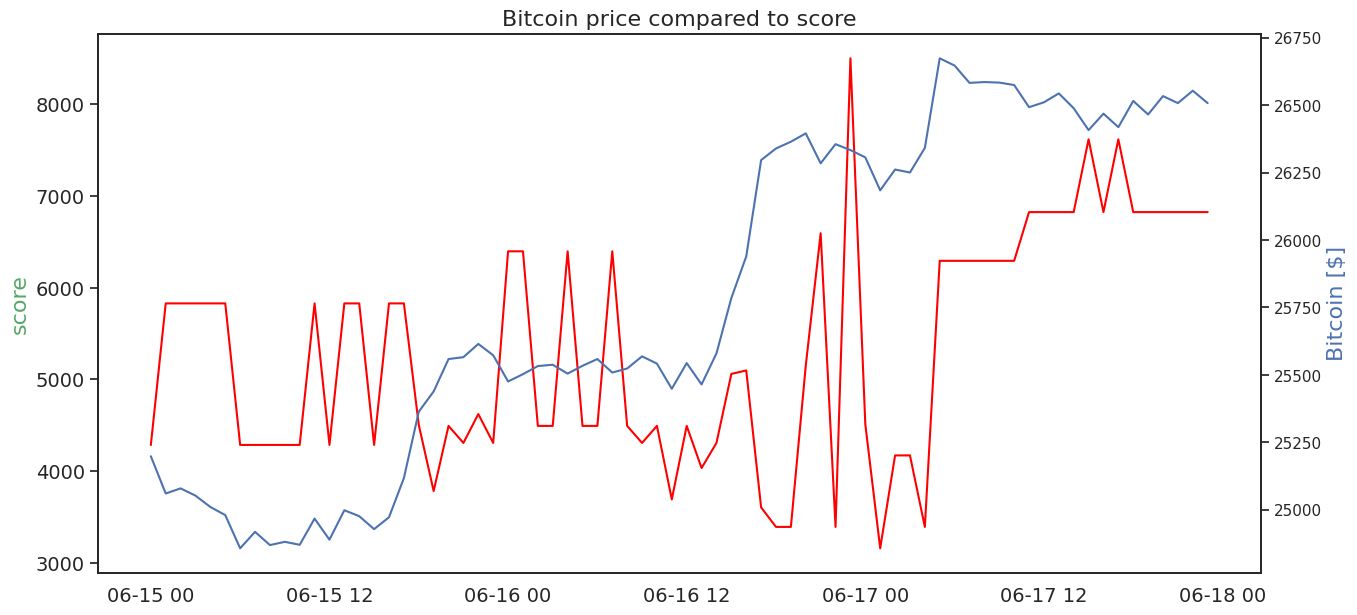

In [235]:
for i in index_list:
  fig, ax1 = plt.subplots(figsize=(15,7))
  ax1.set_title("Bitcoin price compared to "+i, fontsize=16)
  ax1.tick_params(labelsize=14)
  ax2 = ax1.twinx()
  ax1.plot_date(df_today_merged[i].index, df_today_merged[i], 'red')
  ax2.plot_date(df_today_merged['close'].index, df_today_merged['close'], 'b')

  ax1.set_ylabel(i, color='g', fontsize=16)
  ax2.set_ylabel("Bitcoin [$]", color='b', fontsize=16)
  plt.show()

In [236]:
cor = df_today_merged.corr()
cor

close  compound  Volume BTC  tweet_vol     score
close       1.000000  0.493809   -0.210513   0.680356  0.374097
compound    0.493809  1.000000   -0.077755   0.332570  0.436170
Volume BTC -0.210513 -0.077755    1.000000  -0.179468 -0.232907
tweet_vol   0.680356  0.332570   -0.179468   1.000000  0.664645
score       0.374097  0.436170   -0.232907   0.664645  1.000000

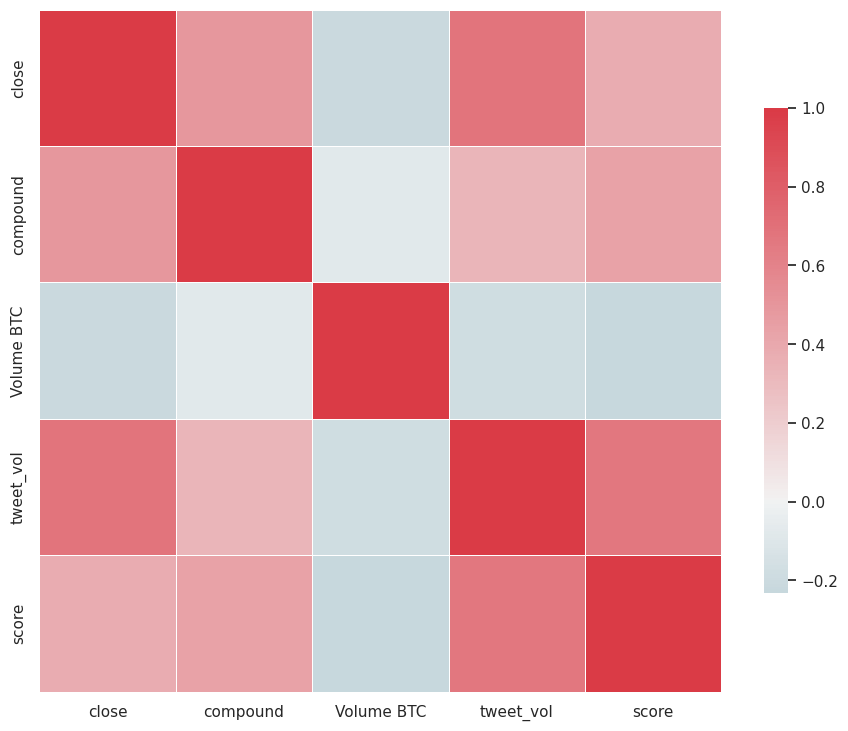

In [237]:
import matplotlib.pyplot as plt
sns.set(style="white")
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax =sns.heatmap(cor, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})
plt.show()

In [238]:
data_next = df_today_merged

train_size = int(len(data_next)*0)
test_data_next = data_next[train_size:]
scaler = MinMaxScaler()
test_data_next =  scaler.fit_transform(test_data_next)

In [239]:
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data)-look_back):
        X.append(data[i:(i+look_back), :])
        Y.append(data[i+look_back, 0])
    return np.array(X), np.array(Y)

look_back = 5
test_X_next, test_Y_next = create_dataset(test_data_next, look_back)

In [240]:
from sklearn.metrics import mean_squared_error
import math

test_predictions_next = model_LSTM_A.predict(test_X_next)
test_mse_next = mean_squared_error(test_Y_next, test_predictions_next)
test_rmse_next = math.sqrt(test_mse_next)

print('Test MSE: {:.4f}'.format(test_mse_next))
print('Test RMSE: {:.4f}'.format(test_rmse_next))

3/3 [==============================] - 0s 6ms/step
Test MSE: 0.0081
Test RMSE: 0.0898


In [241]:
print("Test data R2 score:", r2_score(test_Y_next, test_predictions_next))

Test data R2 score: 0.9274390809459732


In [242]:
test_X_next = test_X_next.reshape((test_X_next.shape[0],look_back * num_features))
#Forecast
test_predictions_next = concatenate((test_predictions_next, test_X_next[:, -4:]), axis=1)
test_predictions_next = scaler.inverse_transform(test_predictions_next)
test_predictions_next = test_predictions_next[:,0]
#Actual
test_Y_next = test_Y_next.reshape((len(test_Y_next), 1))
inv_y_next = concatenate((test_Y_next.reshape(-1,1), test_X_next[:, -4:]), axis=1)
inv_y_next = scaler.inverse_transform(inv_y_next)
inv_y_next = inv_y_next[:,0]

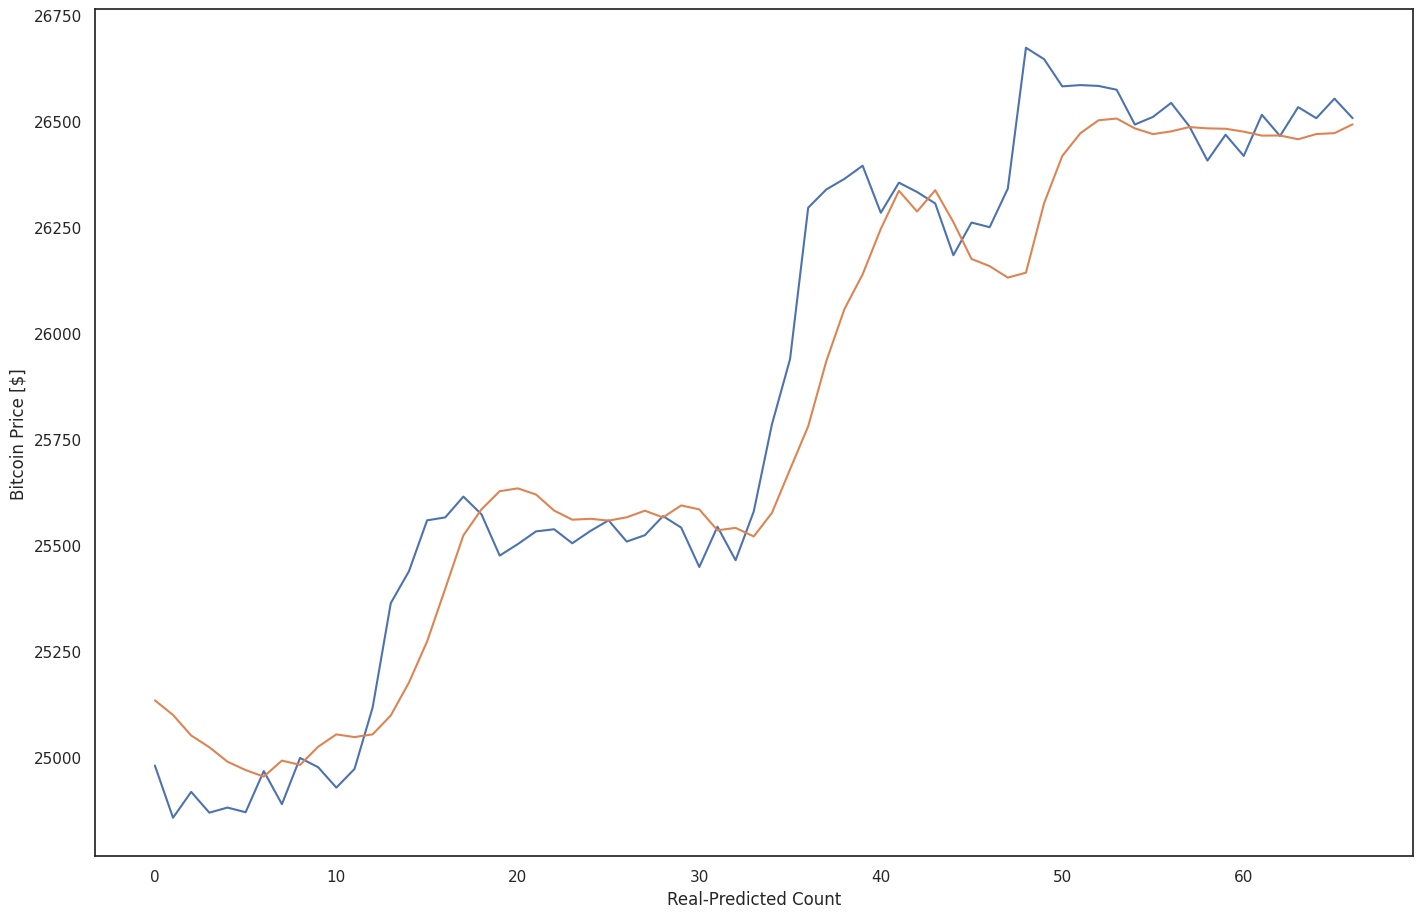

In [243]:
plt.figure(figsize=(17,11))
plt.plot(inv_y_next, label='Real')
plt.plot(test_predictions_next, label='Predicted')
plt.xlabel('Real-Predicted Count')
plt.ylabel('Bitcoin Price [$]')
plt.show()

In [244]:
x_input_next=test_X_next[len(test_X_next)-5:]
def data_prep(data):
    data = np.array(data)
    data = np.reshape(data, (data.shape[0], look_back, 5))
    print(data.shape[0])
    return data


dataset = data_prep(x_input_next)
dataset[0]

5


array([[0.89807163, 0.790209  , 0.03432428, 0.7344    , 0.68612886],
       [0.85344353, 0.94648034, 0.26822802, 0.6544    , 0.83469774],
       [0.88705234, 0.790209  , 0.16415909, 0.7344    , 0.68612886],
       [0.85950413, 0.94648034, 0.04569961, 0.6544    , 0.83469774],
       [0.91294766, 0.790209  , 0.07326015, 0.7344    , 0.68612886]])

In [245]:
predictions = []

for i in range(72):
    prediction = model_LSTM_A.predict(dataset)
    predictions.append(prediction[0])
    dataset = np.append(dataset, prediction)
    dataset = np.array(dataset[5:])
    dataset = np.reshape(dataset, (-1, look_back, 5))
    dataset = data_prep(dataset)


1/1 [==============================] - 0s 31ms/step
5
1/1 [==============================] - 0s 26ms/step
5
1/1 [==============================] - 0s 30ms/step
5
1/1 [==============================] - 0s 26ms/step
5
1/1 [==============================] - 0s 27ms/step
5
1/1 [==============================] - 0s 32ms/step
5
1/1 [==============================] - 0s 25ms/step
5
1/1 [==============================] - 0s 29ms/step
5
1/1 [==============================] - 0s 26ms/step
5
1/1 [==============================] - 0s 25ms/step
5
1/1 [==============================] - 0s 26ms/step
5
1/1 [==============================] - 0s 27ms/step
5
1/1 [==============================] - 0s 27ms/step
5
1/1 [==============================] - 0s 30ms/step
5
1/1 [==============================] - 0s 26ms/step
5
1/1 [==============================] - 0s 25ms/step
5
1/1 [==============================] - 0s 26ms/step
5
1/1 [==============================] - 0s 25ms/step
5
1/1 [=======================

In [246]:
x_input.shape[1]

25

In [247]:
predictions = np.array(predictions)
predictions = np.reshape(predictions, (-1, 1))

In [248]:
reshaped_predictions = np.zeros((72, 5))
predictions = concatenate((predictions, reshaped_predictions[:, -4:]), axis=1)
predictions = scaler.inverse_transform(predictions)
predictions = predictions[:,0]

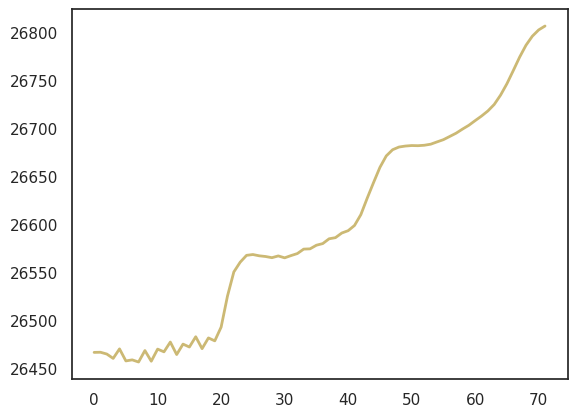

In [249]:
plt.plot(predictions, 'y', label='Real test', linewidth=2)

In [250]:
# Boyutları uyumlu hale getirme
if len(test_predictions) < len(predictions):
    liste1 = np.resize(test_predictions_next, predictions.shape)
else:
    liste2 = np.resize(predictions, test_predictions_next.shape)

# Birleştirme işlemi
merge_list = np.concatenate((test_predictions_next, predictions))


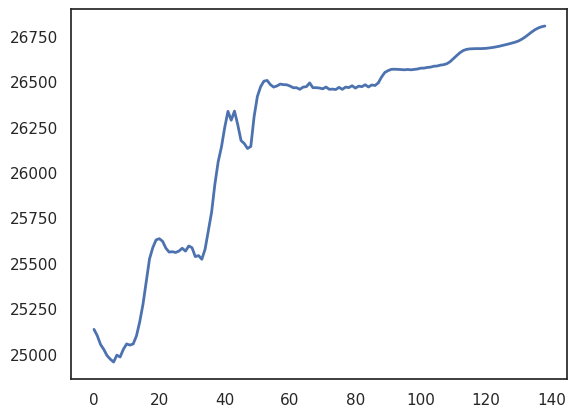

In [251]:
plt.plot(merge_list, 'b', label='Real test', linewidth=2)

In [252]:
predictions

array([26466.15800607, 26466.29572231, 26464.42665446, 26459.87282324,
       26469.80040032, 26457.27525491, 26458.36357015, 26456.14128667,
       26468.06591141, 26456.96174222, 26469.57235175, 26466.73505116,
       26476.91133964, 26463.92068523, 26474.77203208, 26471.74292403,
       26482.4347018 , 26470.03980803, 26481.21332216, 26478.16420037,
       26492.49188143, 26524.80305243, 26549.91760361, 26560.06598103,
       26567.20407414, 26568.05276531, 26566.71465683, 26565.98940182,
       26564.76412761, 26566.59630525, 26564.60250306, 26566.94238085,
       26569.0558328 , 26573.68896174, 26573.96774787, 26577.73725647,
       26579.44167066, 26584.43840075, 26585.61953652, 26590.45042294,
       26592.87868577, 26598.29657006, 26609.59146488, 26626.69489074,
       26642.98824656, 26658.76459855, 26670.71161705, 26677.17865455,
       26679.97841585, 26680.99814343, 26681.53105009, 26681.37634921,
       26681.83958638, 26682.9428308 , 26685.33690798, 26687.64984834,
      

In [253]:
import pandas as pd
import datetime

# Specify the start date and time
start_date = datetime.datetime(2023, 6, 18, 0, 0, 0)

# Create a list of timestamps for the next 72 hours
timestamps = [start_date + datetime.timedelta(hours=i) for i in range(72)]

# Convert the timestamps into a DataFrame
df_future = pd.DataFrame(timestamps, columns=['Timestamp'])

df_future['predictions'] = predictions
df_future.head()

Timestamp   predictions
0 2023-06-18 00:00:00  26466.158006
1 2023-06-18 01:00:00  26466.295722
2 2023-06-18 02:00:00  26464.426654
3 2023-06-18 03:00:00  26459.872823
4 2023-06-18 04:00:00  26469.800400

In [254]:
df_future.tail()

Timestamp   predictions
67 2023-06-20 19:00:00  26773.602087
68 2023-06-20 20:00:00  26785.946568
69 2023-06-20 21:00:00  26795.370340
70 2023-06-20 22:00:00  26801.926195
71 2023-06-20 23:00:00  26805.999696

In [255]:
df_future['Timestamp'] = pd.to_datetime(df_future['Timestamp'])
df_future = df_future.set_index(pd.DatetimeIndex(df_future['Timestamp']))
df_future.head(10)

Timestamp   predictions
Timestamp                                            
2023-06-18 00:00:00 2023-06-18 00:00:00  26466.158006
2023-06-18 01:00:00 2023-06-18 01:00:00  26466.295722
2023-06-18 02:00:00 2023-06-18 02:00:00  26464.426654
2023-06-18 03:00:00 2023-06-18 03:00:00  26459.872823
2023-06-18 04:00:00 2023-06-18 04:00:00  26469.800400
2023-06-18 05:00:00 2023-06-18 05:00:00  26457.275255
2023-06-18 06:00:00 2023-06-18 06:00:00  26458.363570
2023-06-18 07:00:00 2023-06-18 07:00:00  26456.141287
2023-06-18 08:00:00 2023-06-18 08:00:00  26468.065911
2023-06-18 09:00:00 2023-06-18 09:00:00  26456.961742

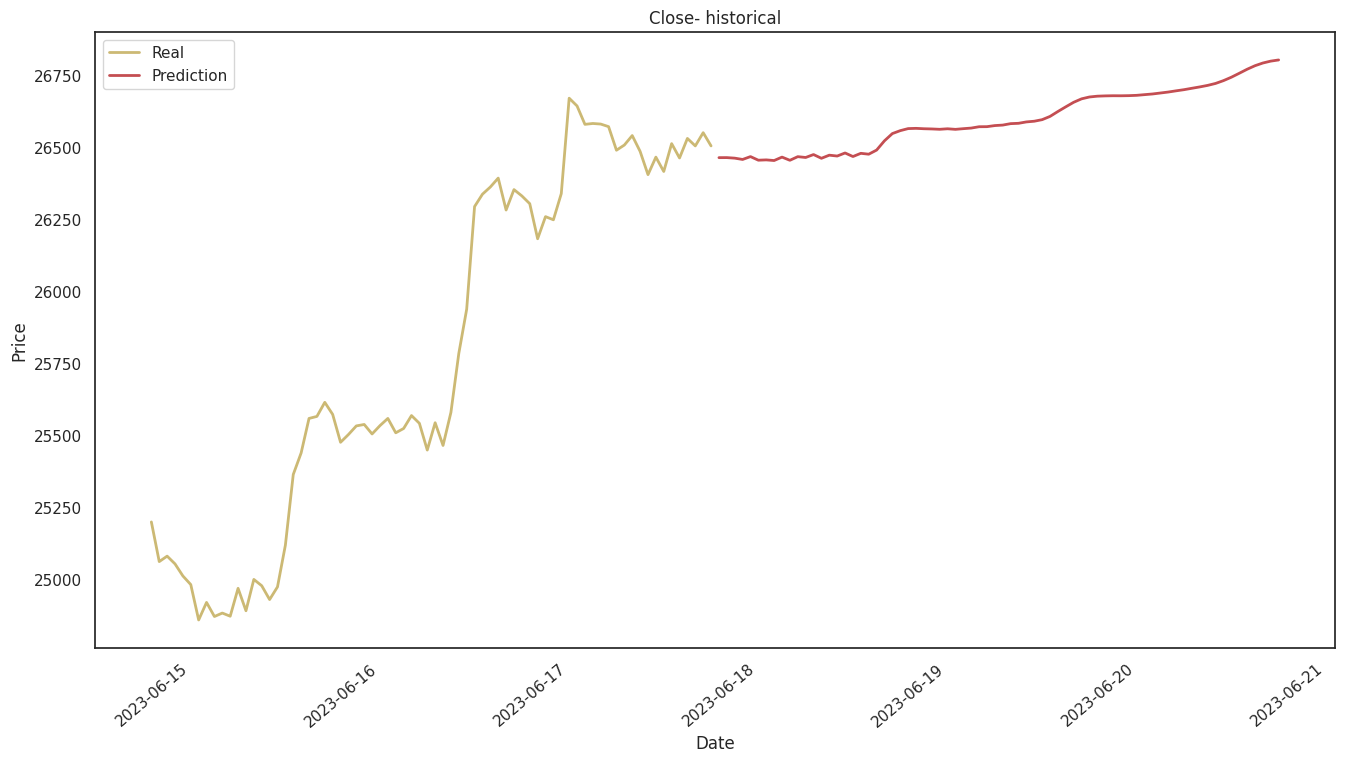

In [256]:
plt.figure(figsize=(16,8))
plt.plot(df_today_merged['close'], 'y', label='Real', linewidth=2)
plt.plot(df_future['predictions'], 'r', label='Prediction', linewidth=2)
plt.xticks(rotation=40)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close'+'- historical')
plt.legend()
plt.show()

In [257]:
df_today_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2023-06-15 00:00:00 to 2023-06-17 23:00:00
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   close       72 non-null     float64
 1   compound    72 non-null     float64
 2   Volume BTC  72 non-null     float64
 3   tweet_vol   72 non-null     float64
 4   score       72 non-null     float64
dtypes: float64(5)
memory usage: 3.4 KB


In [258]:
json_df_today_merged = df_today_merged.drop(['compound','Volume BTC','tweet_vol', 'score'], axis = 1)
timestamps = pd.date_range(start='2023-05-20 00:00:00', end='2023-05-22 23:00:00', freq='H')
json_df_today_merged['Timestamp'] = timestamps
json_df_today_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2023-06-15 00:00:00 to 2023-06-17 23:00:00
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   close      72 non-null     float64       
 1   Timestamp  72 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 KB


In [259]:
from google.colab import files
json_data = json_df_today_merged.to_json(orient='records', date_format='iso')

# Save JSON to a file
file_path = 'json_df_today_merged.json'  # Specify the file path and name
with open(file_path, 'w') as file:
    file.write(json_data)
# Download the JSON file
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [260]:
df_future.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2023-06-18 00:00:00 to 2023-06-20 23:00:00
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    72 non-null     datetime64[ns]
 1   predictions  72 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 KB


In [261]:
df_future = df_future.drop(['Timestamp'], axis = 1)
timestamps = pd.date_range(start='2023-05-23 00:00:00', end='2023-05-25 23:00:00', freq='H')
df_future['Timestamp'] = timestamps
df_future.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2023-06-18 00:00:00 to 2023-06-20 23:00:00
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   predictions  72 non-null     float64       
 1   Timestamp    72 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 KB


In [262]:
df_future.head()

predictions           Timestamp
Timestamp                                            
2023-06-18 00:00:00  26466.158006 2023-05-23 00:00:00
2023-06-18 01:00:00  26466.295722 2023-05-23 01:00:00
2023-06-18 02:00:00  26464.426654 2023-05-23 02:00:00
2023-06-18 03:00:00  26459.872823 2023-05-23 03:00:00
2023-06-18 04:00:00  26469.800400 2023-05-23 04:00:00

In [263]:
from google.colab import files
json_data = df_future.to_json(orient='records', date_format='iso')

# Save JSON to a file
file_path = 'df_future.json'  # Specify the file path and name
with open(file_path, 'w') as file:
    file.write(json_data)
# Download the JSON file
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>